Michael Sternbach

# Heading

I spent a ton of time on this project over the past week and I think my score is very reflective of this. While I eventually figured out how to optimize my score there were a ton of failed attempts along the way. There were quite a few variables that I tried to create that ended up failing. Additionally, I tried feature scaling and removing outliers multiple times in multiple different ways, and I could never get them to work no matter what I did. Overall, I really enjoyed doing this project and would've not put in so much effort if I didn't. It has definetly inspired me to continue to explore data science and machine learning.

In [ ]:
# load the libraries
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

from sklearn.model_selection import GridSearchCV

In [ ]:
# load the data to dataframes
train_df = pd.read_csv("https://s3.amazonaws.com/it4ba/Kaggle/train.csv")
test_df    = pd.read_csv("https://s3.amazonaws.com/it4ba/Kaggle/test.csv")

# Feature Engineering

In [ ]:
for column in train_df[:-1]:
  if train_df[column].dtype in [float,int]:
      if train_df[column].isna().count() > 0:
        train_df[column].fillna(0,inplace=True)
  elif train_df[column].dtype == object:
    if train_df[column].isna().count() > 0:
      train_df[column].fillna('None',inplace=True)

In [ ]:
for column in test_df:
    if test_df[column].dtype in [float,int]:
      if test_df[column].isna().count() > 0:
        test_df[column].fillna(0,inplace=True)
    elif test_df[column].dtype == object:
      if test_df[column].isna().count() > 0:
        test_df[column].fillna('None',inplace=True)

In [ ]:
# I grouped neighborhood and sale price to see if there were large differences accross neighborhoods

train_df.groupby('Neighborhood')['SalePrice'].agg([np.min,np.max,np.mean,np.median]).sort_values(by='median', ascending=False)

amin    amax           mean    median
Neighborhood                                         
NridgHt       154000  611657  316270.623377  315000.0
NoRidge       190000  755000  335295.317073  301500.0
StoneBr       170000  556581  310499.000000  278000.0
Timber        137500  378500  242247.447368  228475.0
Somerst       144152  423000  225379.837209  225500.0
Veenker       162500  385000  238772.727273  218000.0
Crawfor        90350  392500  210624.725490  200624.0
ClearCr       130000  328000  212565.428571  200250.0
CollgCr       110000  424870  197965.773333  197200.0
Blmngtn       159895  264561  194870.882353  191000.0
NWAmes         82500  299800  189050.068493  182900.0
Gilbert       141000  377500  192854.506329  181000.0
SawyerW        76000  320000  186555.796610  179900.0
Mitchel        84500  271000  156270.122449  153500.0
NPkVill       127500  155000  142694.444444  146000.0
NAmes          87500  345000  145847.080000  140000.0
SWISU          60000  200000  142591.360000  139500.0
Blueste       124000  151000  137500.000000  137500.0
Sawyer         62383  190000  136793.135135  135000.0
BrkSide        39300  223500  124834.051724  124300.0
Edwards        58500  320000  128219.700000  121750.0
OldTown        37900  475000  128225.300885  119000.0
BrDale         83000  125000  104493.750000  106000.0
IDOTRR         34900  169500  100123.783784  103000.0
MeadowV        75000  151400   98576.470588   88000.0

In [ ]:
# I wanted to make a new neighborhood variable and I thought using median was the best way to do so

NeighMedian = train_df.groupby('Neighborhood')['SalePrice'].median().sort_values()
print(NeighMedian)

Neighborhood
MeadowV     88000.0
IDOTRR     103000.0
BrDale     106000.0
OldTown    119000.0
Edwards    121750.0
BrkSide    124300.0
Sawyer     135000.0
Blueste    137500.0
SWISU      139500.0
NAmes      140000.0
NPkVill    146000.0
Mitchel    153500.0
SawyerW    179900.0
Gilbert    181000.0
NWAmes     182900.0
Blmngtn    191000.0
CollgCr    197200.0
ClearCr    200250.0
Crawfor    200624.0
Veenker    218000.0
Somerst    225500.0
Timber     228475.0
StoneBr    278000.0
NoRidge    301500.0
NridgHt    315000.0
Name: SalePrice, dtype: float64


In [ ]:
# I arbitrarily seperated the neighborhoods by where I thought the medians were the most similar
# I used my own guesstimates, so this could possibly have been improved with a more mathematical approach

train_df['Neigh_Type'] = 'Luxury'

train_df.loc[train_df['Neighborhood'].isin(['Timber', 'Somerst', 'Veenker']), 'Neigh_Type'] = 'SemiLuxury'
train_df.loc[train_df['Neighborhood'].isin(['Crawfor', 'ClearCr', 'CollgCr', 'Blmngtn', 'NWAmes', 'Gilbert', 'SawyerW']), 'Neigh_Type'] = 'Great'
train_df.loc[train_df['Neighborhood'].isin(['Mitchel', 'NPkVill', 'NAmes', 'SWISU', 'Blueste', 'Sawyer']), 'Neigh_Type'] = 'Medium'
train_df.loc[train_df['Neighborhood'].isin(['BrkSide', 'Edwards', 'OldTown']), 'Neigh_Type'] = 'Ok'
train_df.loc[train_df['Neighborhood'].isin(['BrDale', 'IDOTRR', 'MeadowV']), 'Neigh_Type'] = 'Poor'

test_df['Neigh_Type'] = 'Luxury'

test_df.loc[test_df['Neighborhood'].isin(['Timber', 'Somerst', 'Veenker']), 'Neigh_Type'] = 'SemiLuxury'
test_df.loc[test_df['Neighborhood'].isin(['Crawfor', 'ClearCr', 'CollgCr', 'Blmngtn', 'NWAmes', 'Gilbert', 'SawyerW']), 'Neigh_Type'] = 'Great'
test_df.loc[test_df['Neighborhood'].isin(['Mitchel', 'NPkVill', 'NAmes', 'SWISU', 'Blueste', 'Sawyer']), 'Neigh_Type'] = 'Medium'
test_df.loc[test_df['Neighborhood'].isin(['BrkSide', 'Edwards', 'OldTown']), 'Neigh_Type'] = 'Ok'
test_df.loc[test_df['Neighborhood'].isin(['BrDale', 'IDOTRR', 'MeadowV']), 'Neigh_Type'] = 'Poor'



In [ ]:
# I seperated the years of the houses into 20 year intervals
# When I looked on the scatter plot I saw that there was a clear difference in prices in different time periods

train_df['YearInterval'] = 0
train_df.loc[(1900 < train_df['YearBuilt']) & (train_df['YearBuilt'] <= 1920), 'YearInterval'] = 1
train_df.loc[(1920 < train_df['YearBuilt']) & (train_df['YearBuilt'] <= 1940), 'YearInterval'] = 2
train_df.loc[(1940 < train_df['YearBuilt']) & (train_df['YearBuilt'] <= 1960), 'YearInterval'] = 3
train_df.loc[(1960 < train_df['YearBuilt']) & (train_df['YearBuilt'] <= 1980), 'YearInterval'] = 4
train_df.loc[(1980 < train_df['YearBuilt']) & (train_df['YearBuilt'] <= 2000), 'YearInterval'] = 5
train_df.loc[train_df['YearBuilt'] > 2000, 'YearInterval'] = 6

test_df['YearInterval'] = 0
test_df.loc[(1900 < test_df['YearBuilt']) & (test_df['YearBuilt'] <= 1920), 'YearInterval'] = 1
test_df.loc[(1920 < test_df['YearBuilt']) & (test_df['YearBuilt'] <= 1940), 'YearInterval'] = 2
test_df.loc[(1940 < test_df['YearBuilt']) & (test_df['YearBuilt'] <= 1960), 'YearInterval'] = 3
test_df.loc[(1960 < test_df['YearBuilt']) & (test_df['YearBuilt'] <= 1980), 'YearInterval'] = 4
test_df.loc[(1980 < test_df['YearBuilt']) & (test_df['YearBuilt'] <= 2000), 'YearInterval'] = 5
test_df.loc[test_df['YearBuilt'] > 2000, 'YearInterval'] = 6


<Axes: xlabel='Neigh_Type', ylabel='MoSold'>

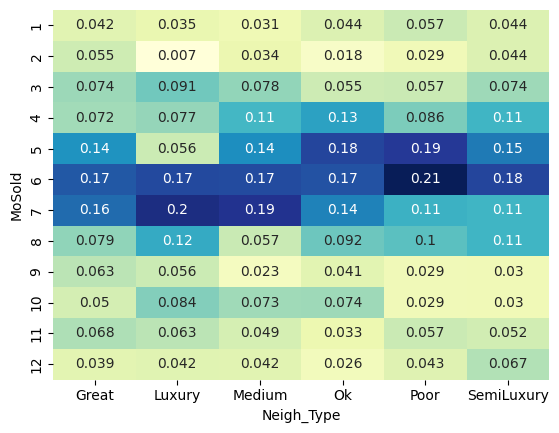

In [ ]:
# While not perfect the Neigh Type variable helped me visually see the differences between the test and training set for varibables
# Using heatmaps helped me see clear differences from the training and test set
# One example of how it was useful was using it to see that year sold and month sold were not predictive at all

sns.heatmap(pd.crosstab(train_df.MoSold,train_df.Neigh_Type,  normalize = "columns"), cmap="YlGnBu", annot=True, cbar=False)

<Axes: xlabel='Neigh_Type', ylabel='MoSold'>

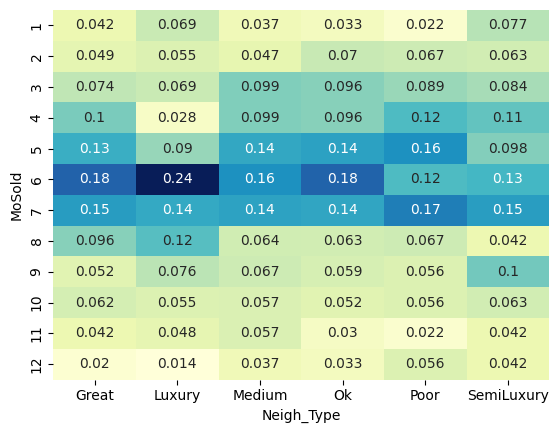

In [ ]:
sns.heatmap(pd.crosstab(test_df.MoSold,test_df.Neigh_Type,  normalize = "columns"), cmap="YlGnBu", annot=True, cbar=False)

<Axes: xlabel='Neigh_Type', ylabel='YrSold'>

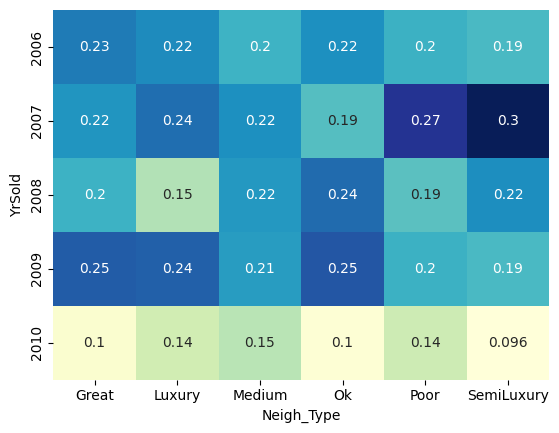

In [ ]:
sns.heatmap(pd.crosstab(train_df.YrSold,train_df.Neigh_Type,  normalize = "columns"), cmap="YlGnBu", annot=True, cbar=False)

<Axes: xlabel='Neigh_Type', ylabel='YrSold'>

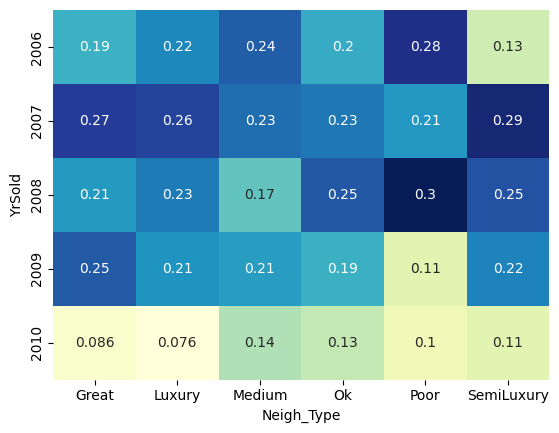

In [ ]:
# As you can see there were clear differences in the training and test sets for year and month sold

sns.heatmap(pd.crosstab(test_df.YrSold,test_df.Neigh_Type,  normalize = "columns"), cmap="YlGnBu", annot=True, cbar=False)

In [ ]:
train_df.drop(columns=['YrSold', 'MoSold'],inplace=True)
test_df.drop(columns=['YrSold', 'MoSold'],inplace=True)

In [ ]:
# I created dummy variables for the garage and basement with 0 being if the house didn't have it and 1 if it did
# I tried this for other variables such as porch, second floor, and lot frontage but none of those had an effect

train_df['GarageDummy'] = 1
train_df.loc[train_df['GarageYrBlt'] < 1700, 'GarageDummy'] = 0
test_df['GarageDummy'] = 1
test_df.loc[test_df['GarageYrBlt'] < 1700, 'GarageDummy'] = 0

train_df['BsmtDummy'] = 1
train_df.loc[train_df['BsmtQual'] == 'None', 'BsmtDummy'] = 0
test_df['BsmtDummy'] = 1
test_df.loc[test_df['BsmtQual'] == 'None', 'BsmtDummy'] = 0


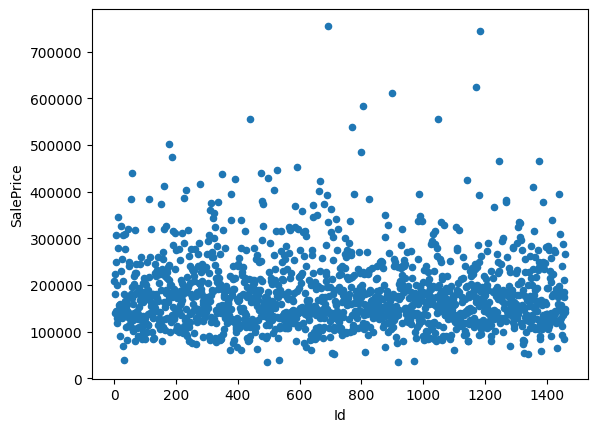

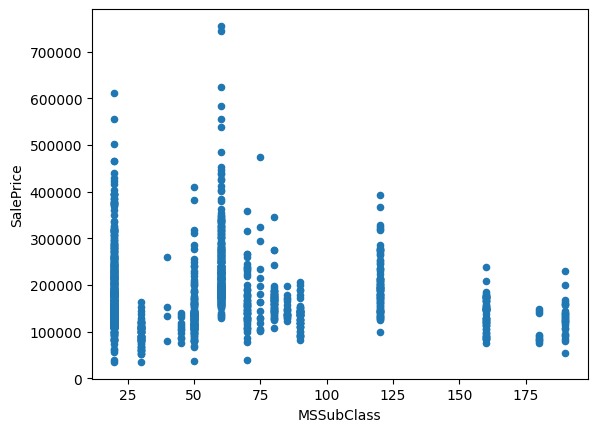

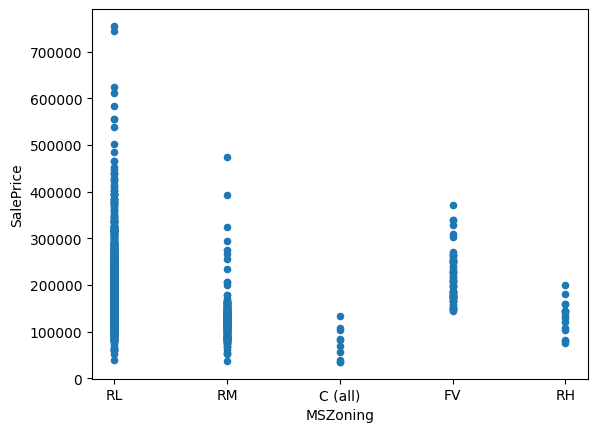

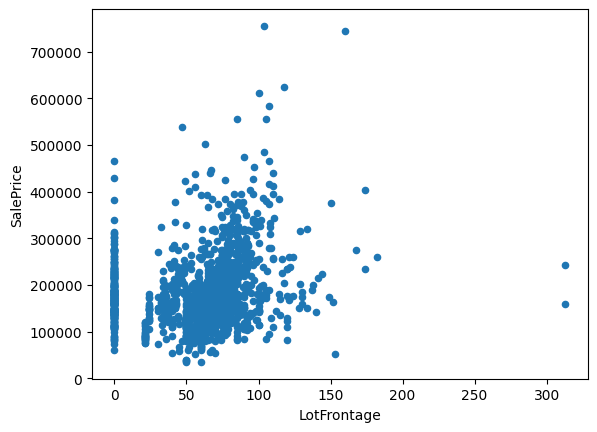

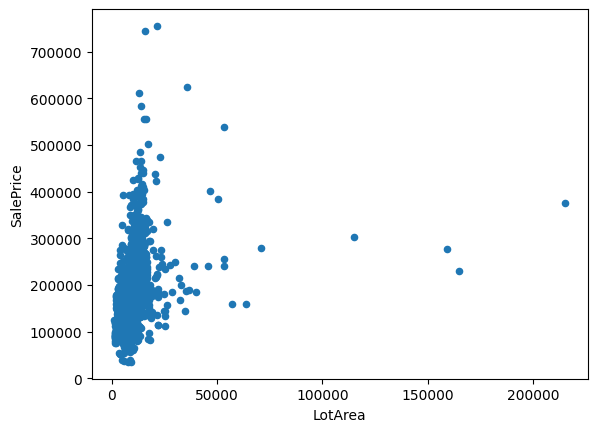

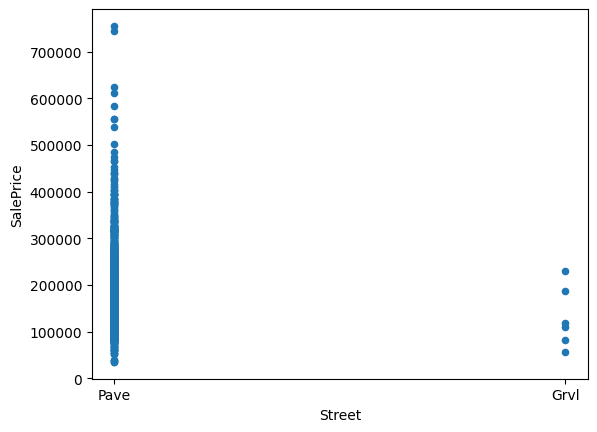

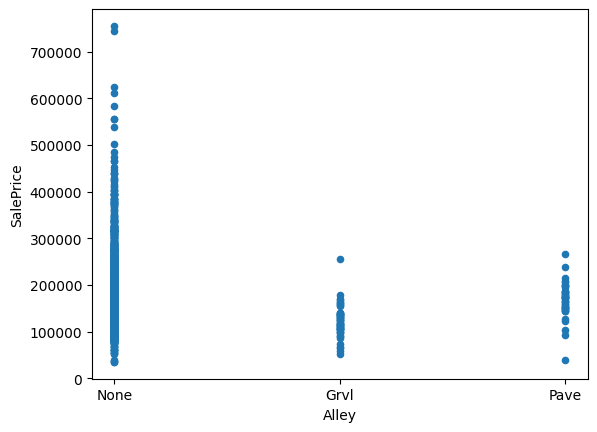

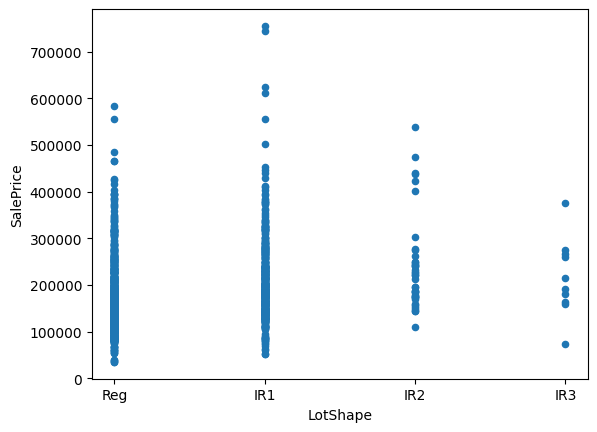

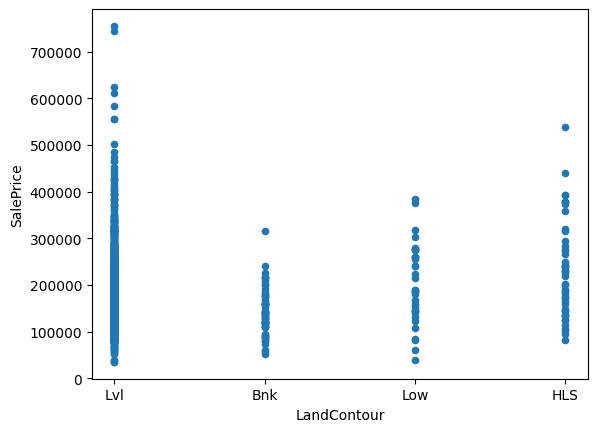

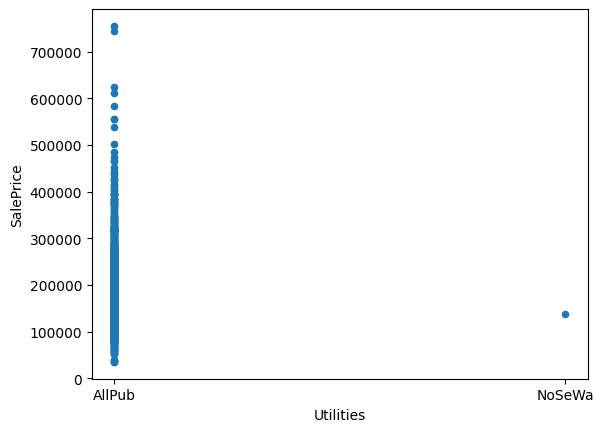

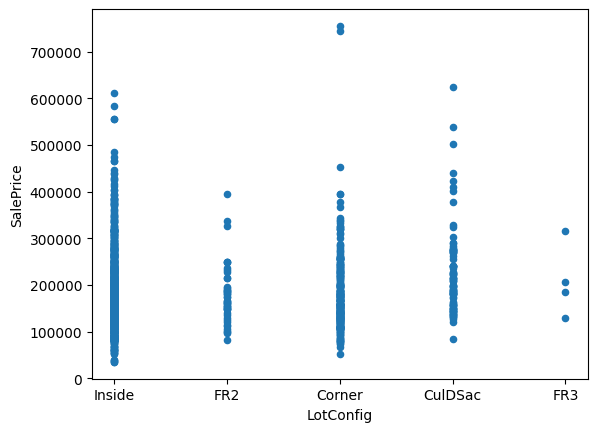

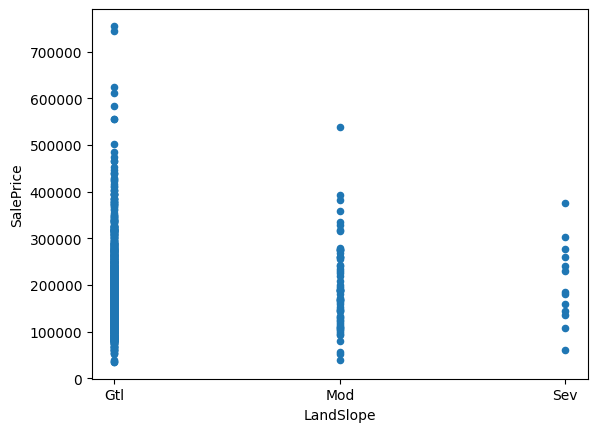

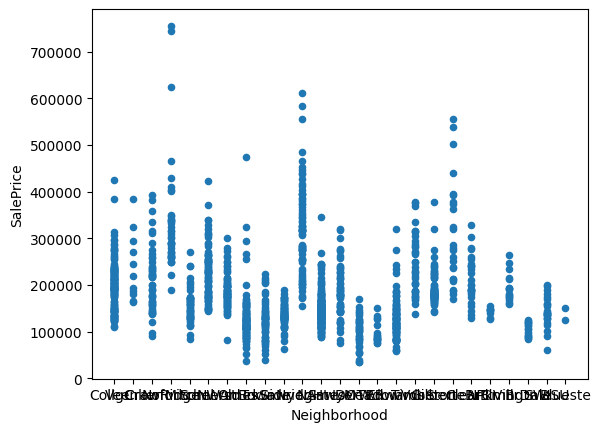

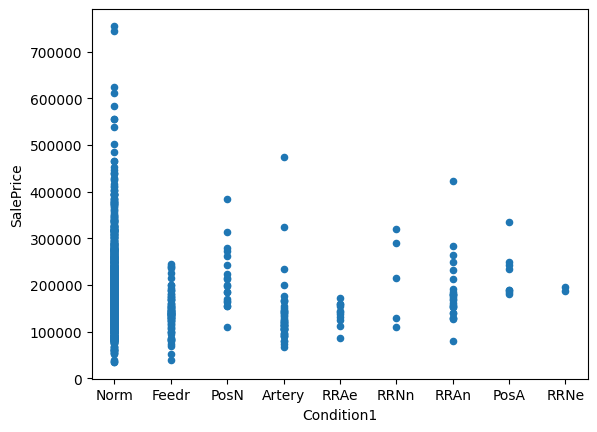

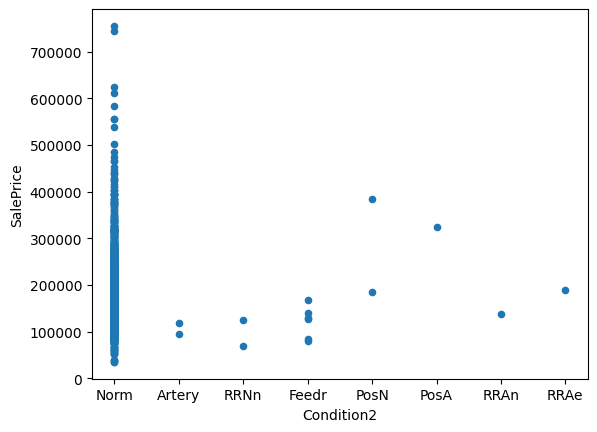

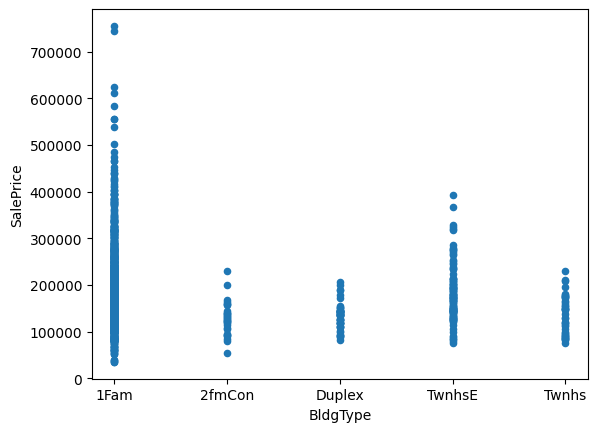

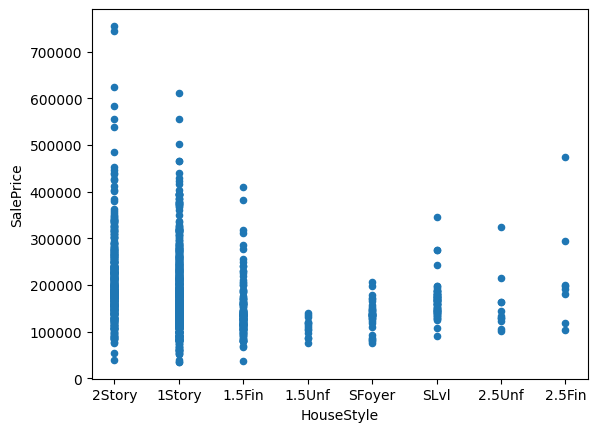

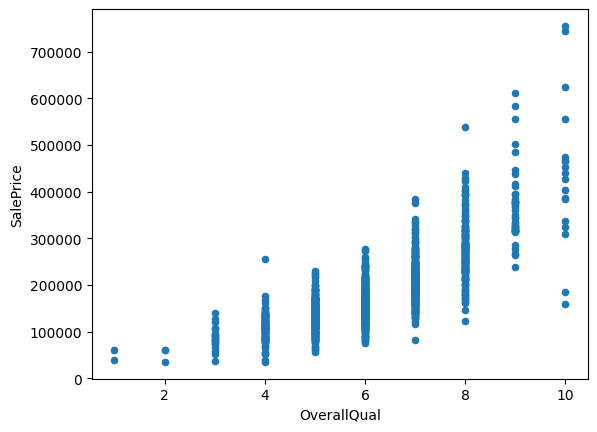

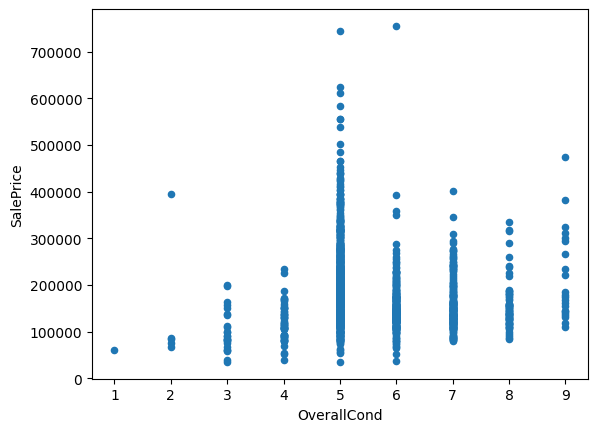

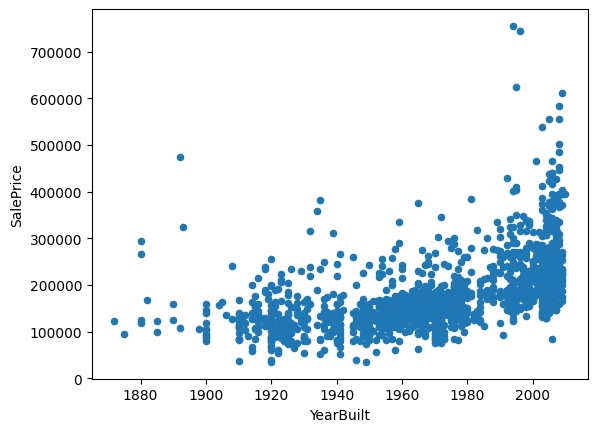

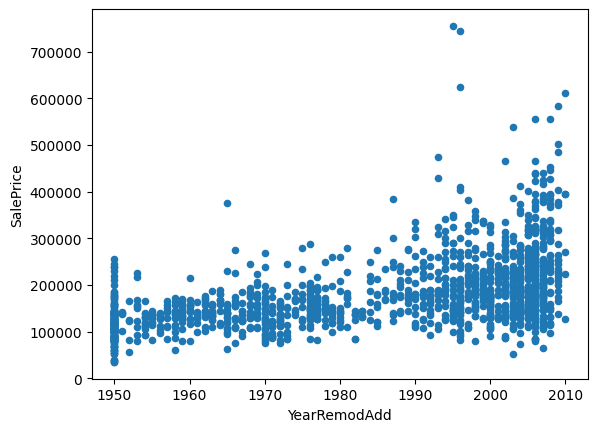

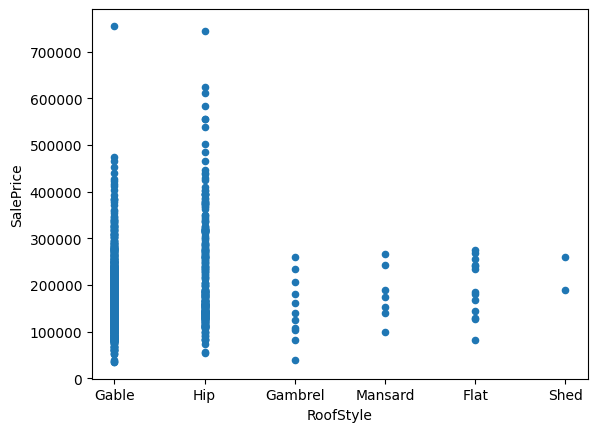

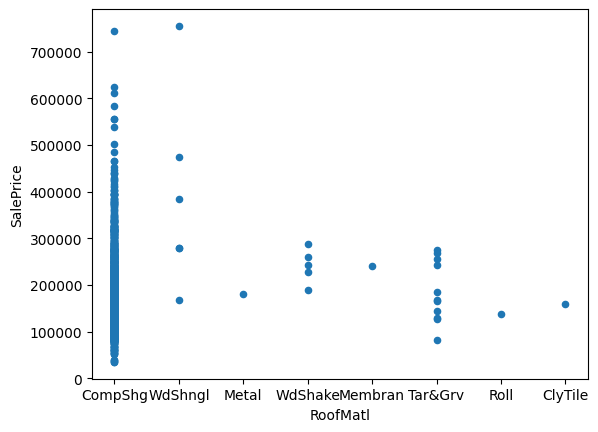

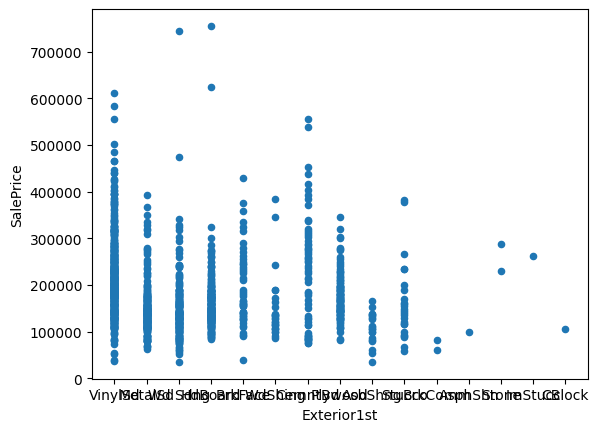

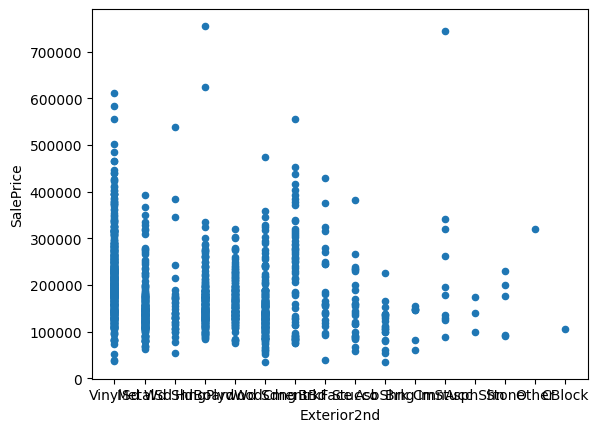

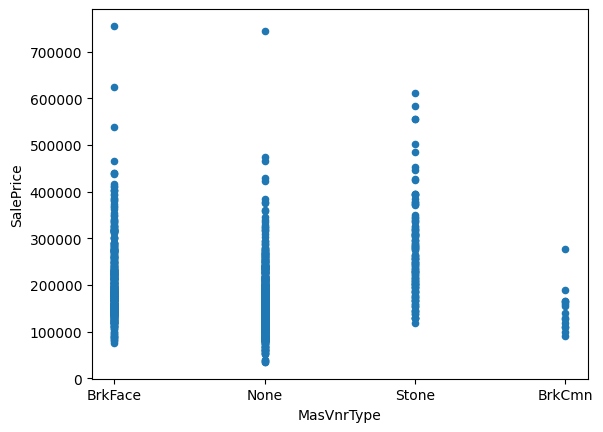

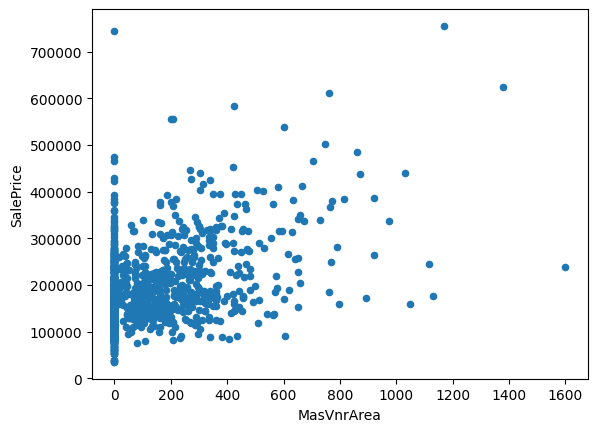

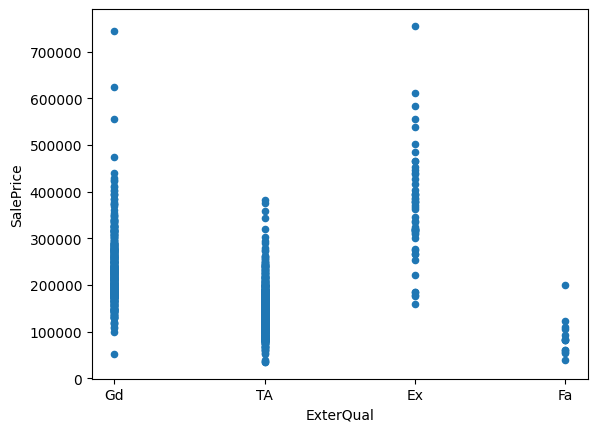

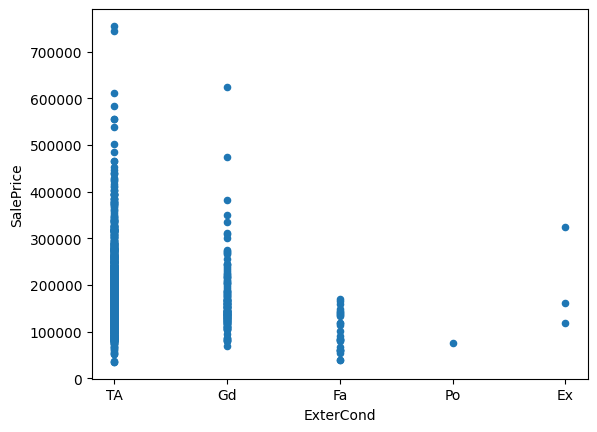

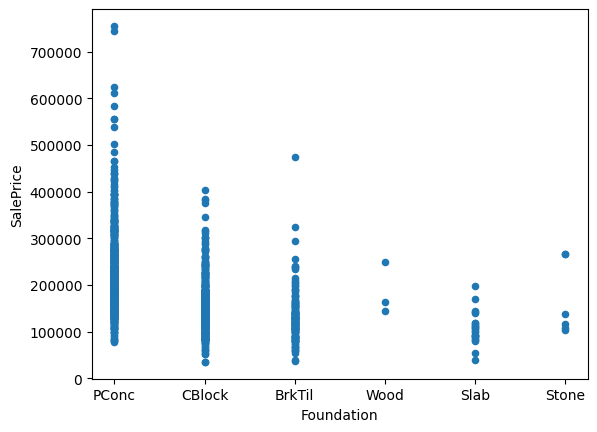

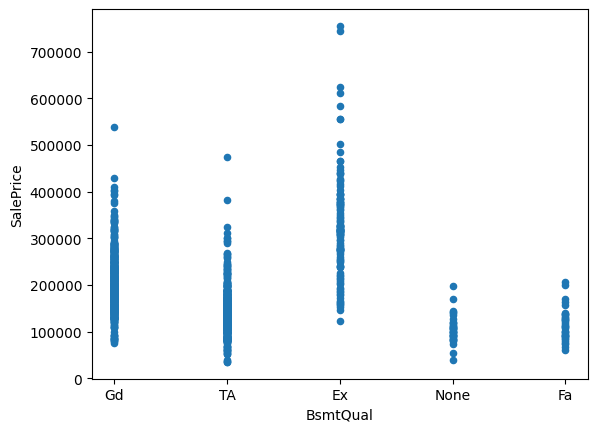

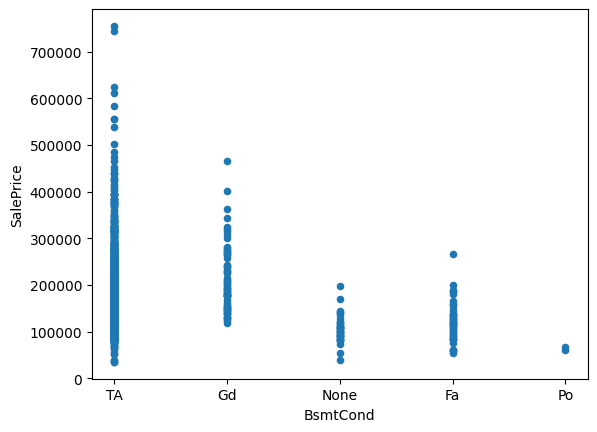

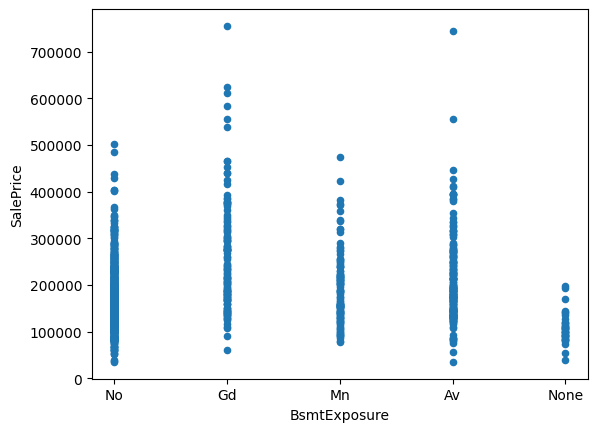

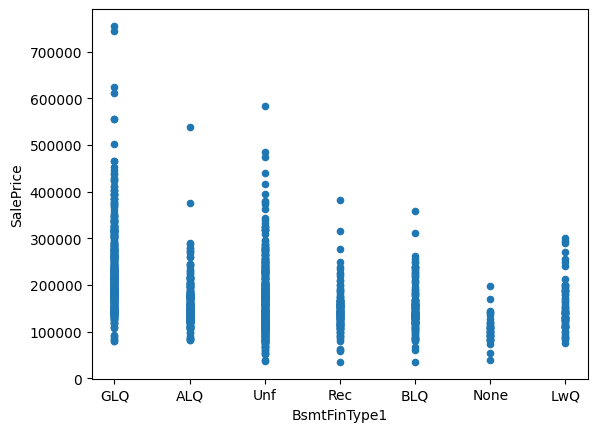

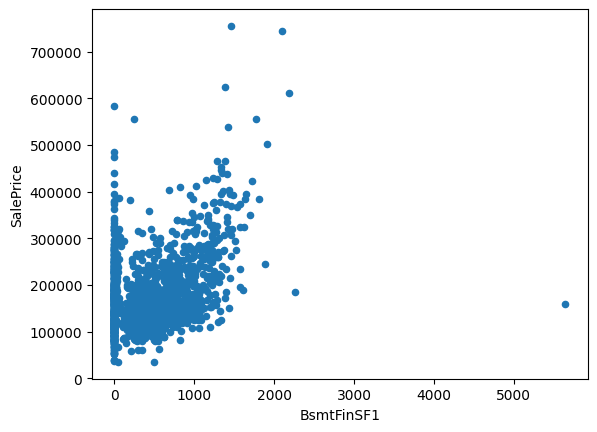

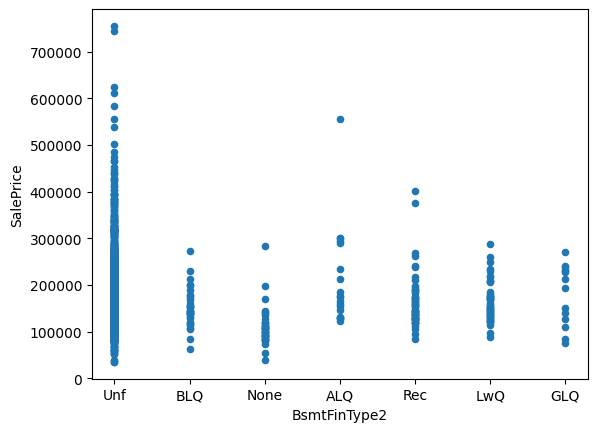

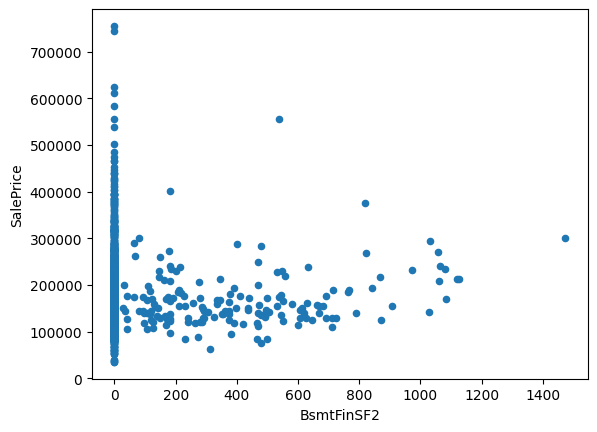

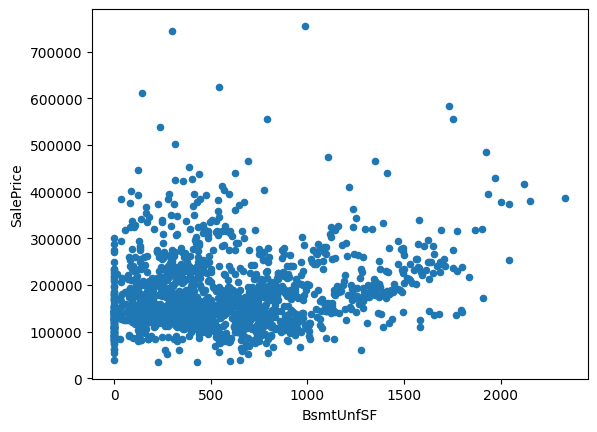

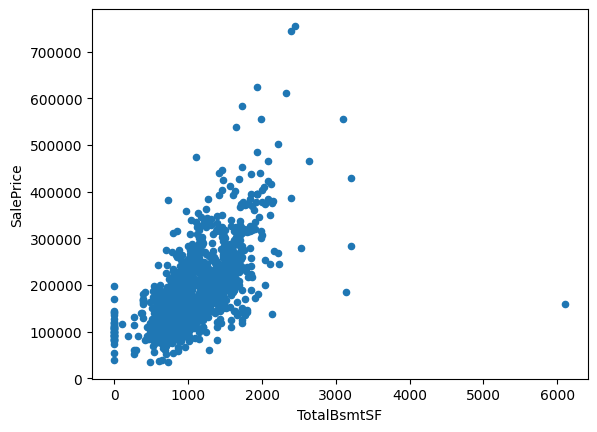

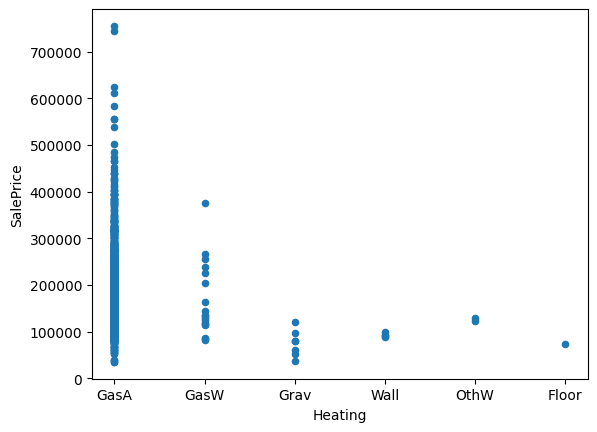

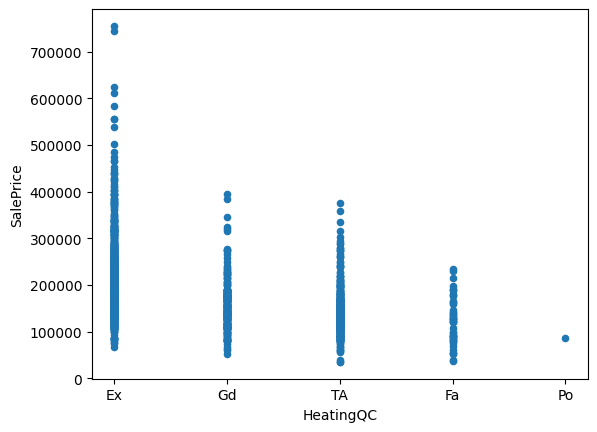

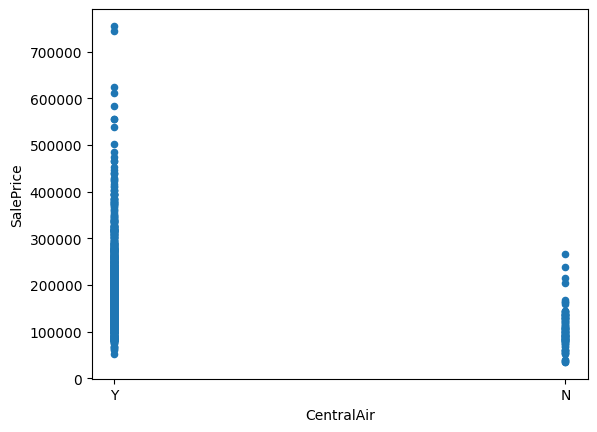

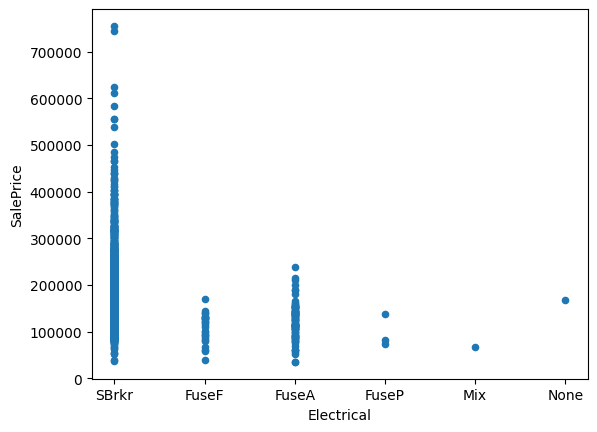

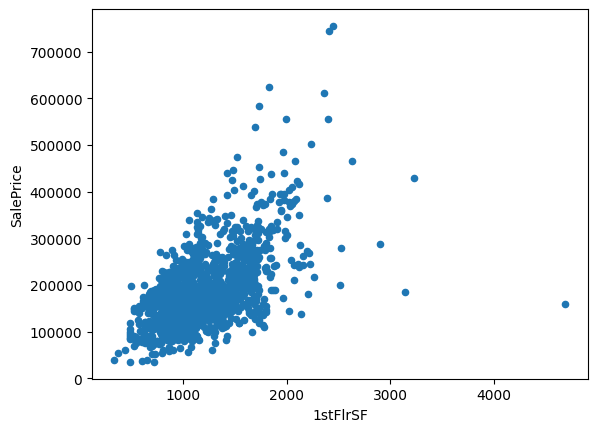

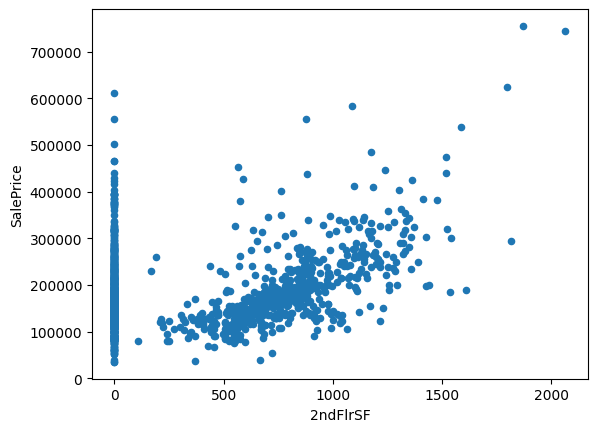

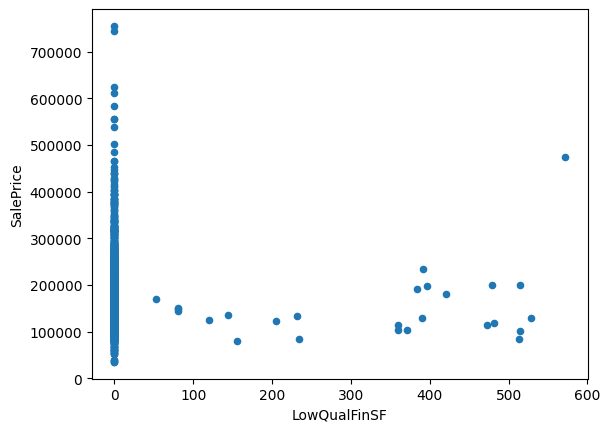

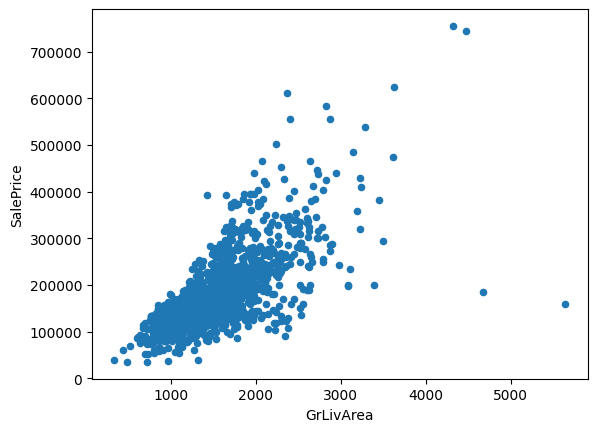

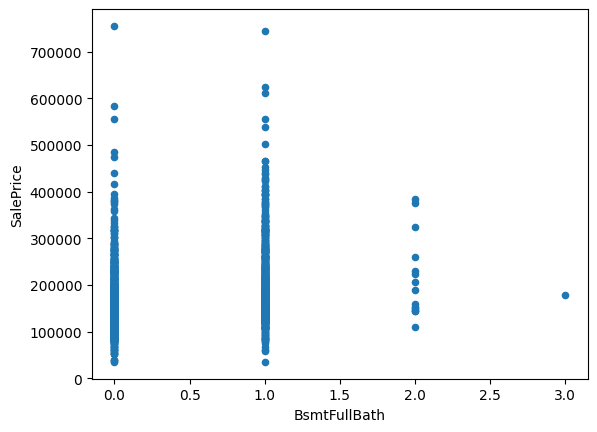

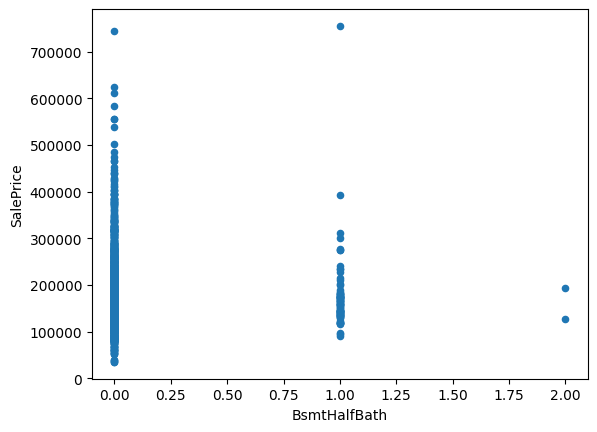

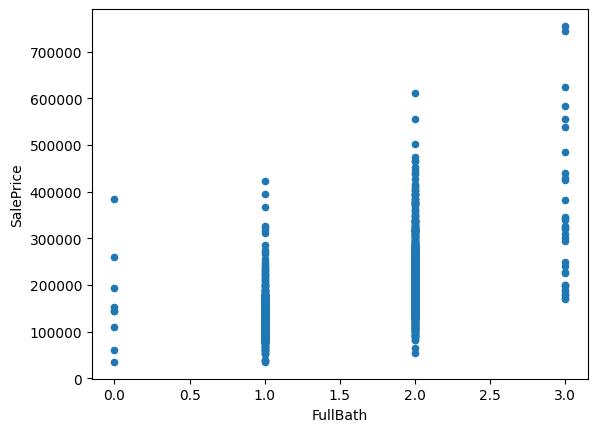

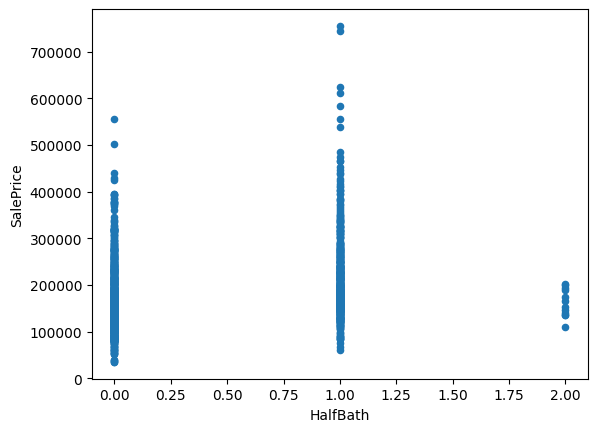

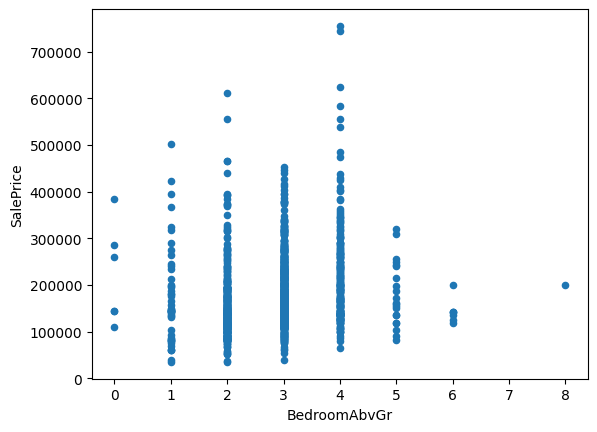

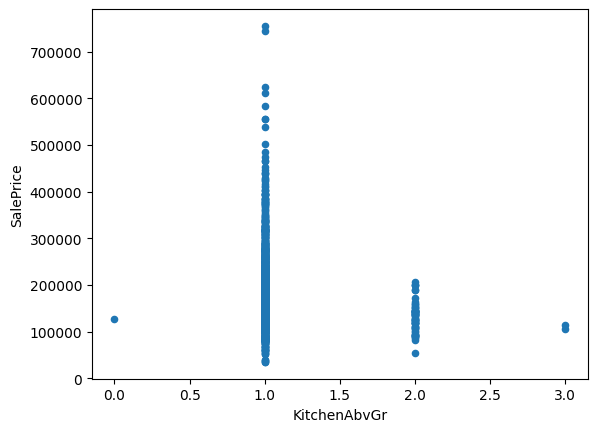

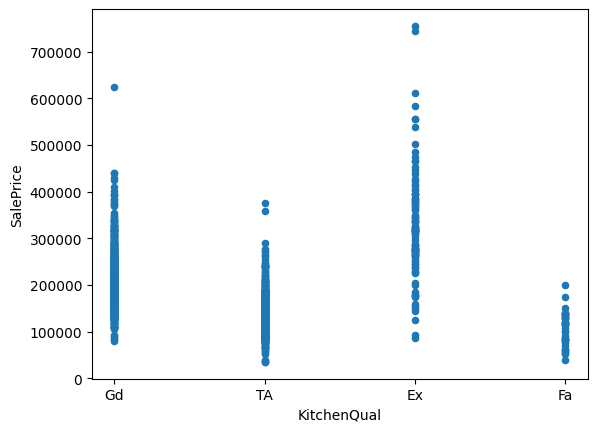

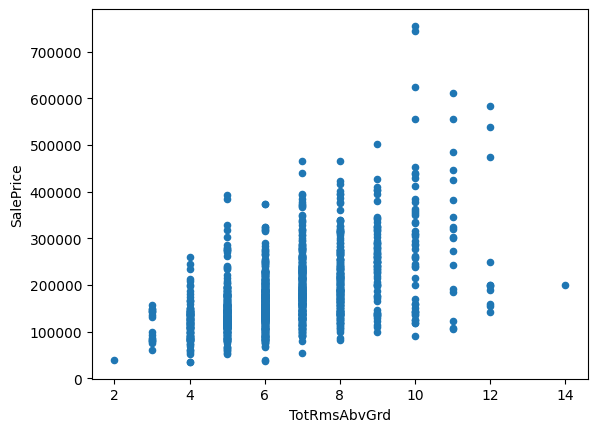

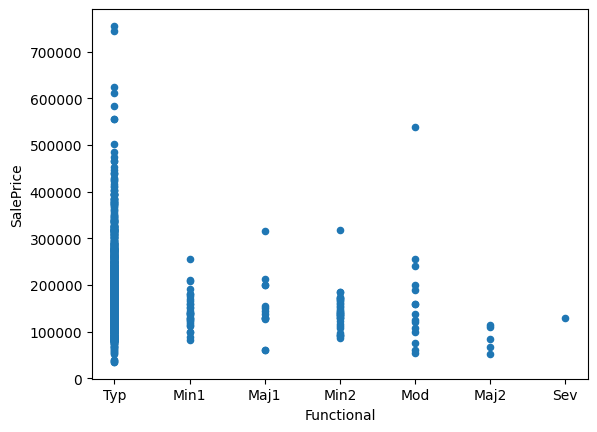

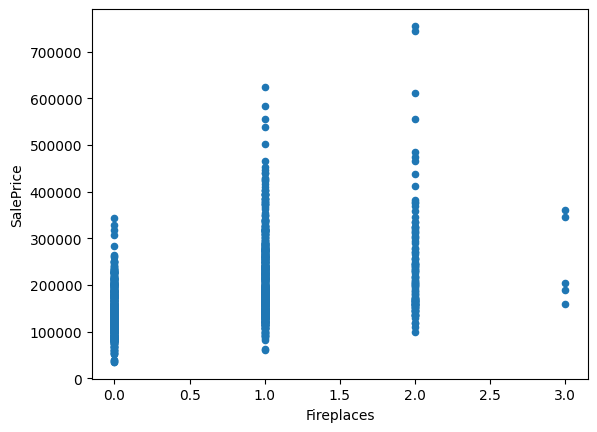

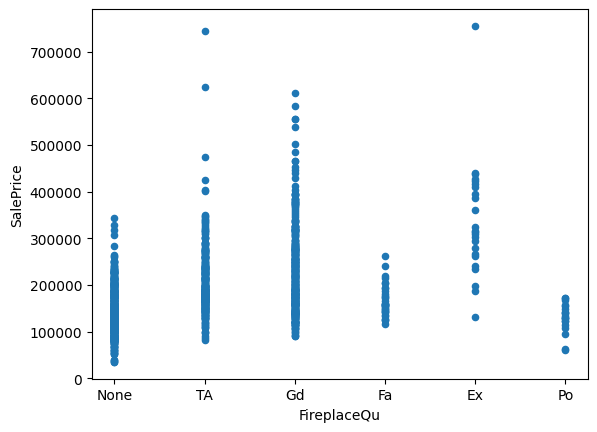

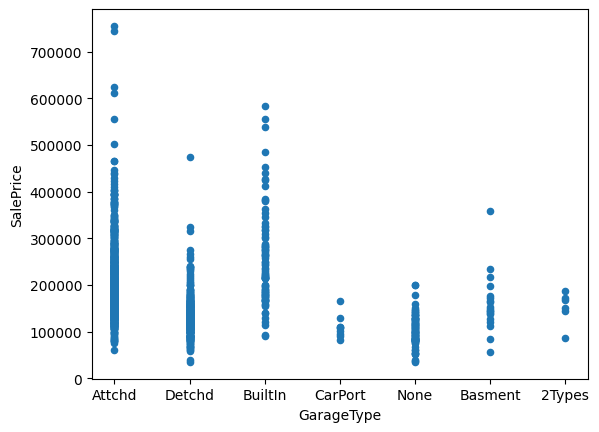

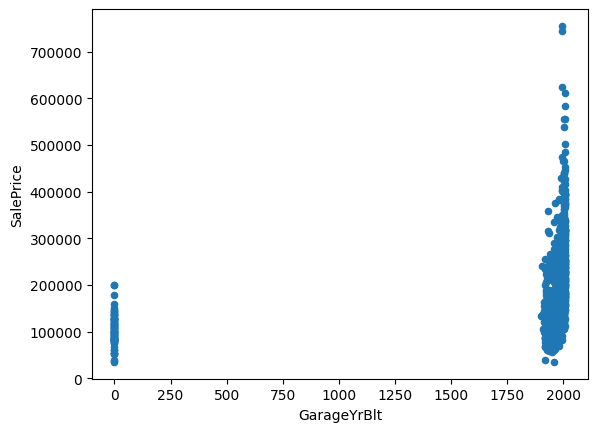

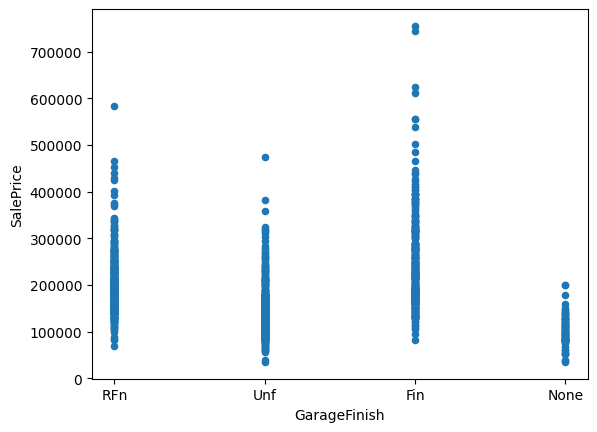

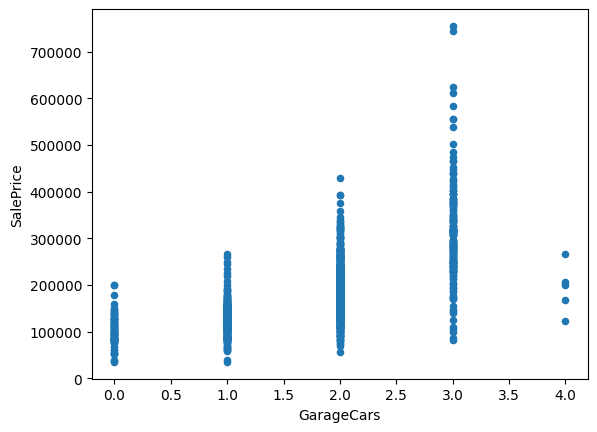

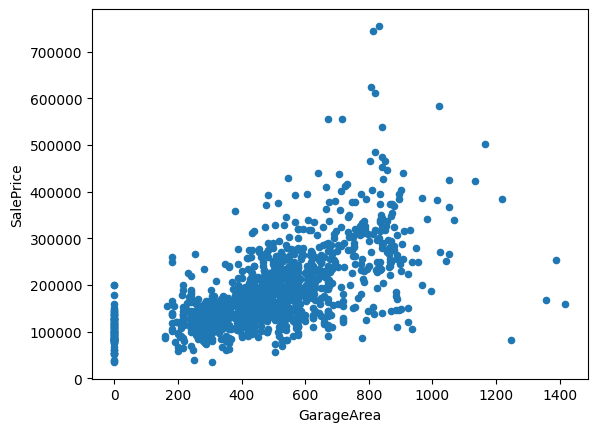

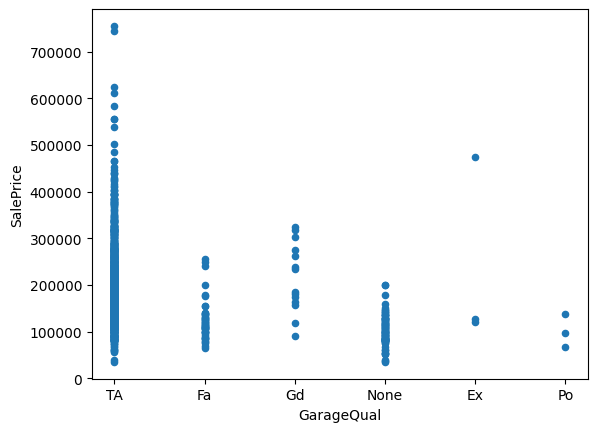

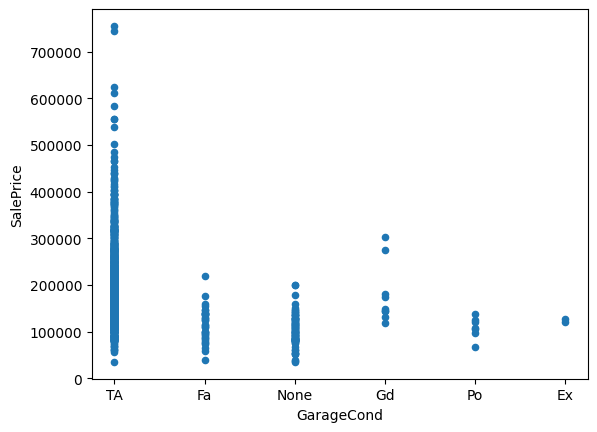

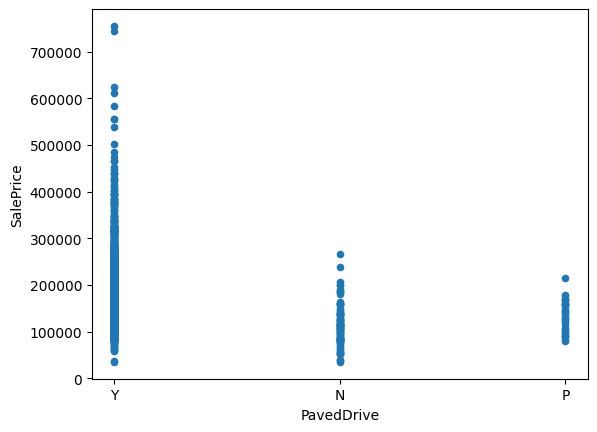

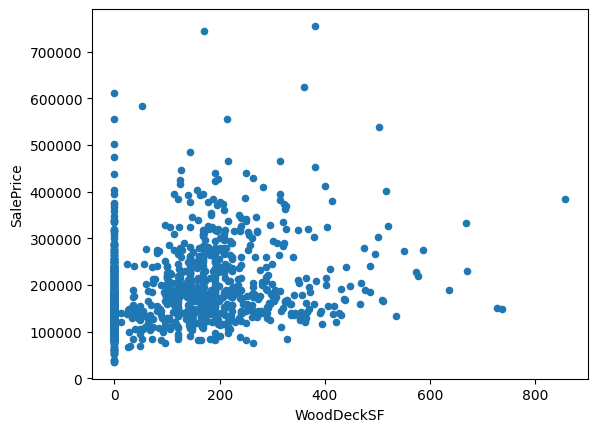

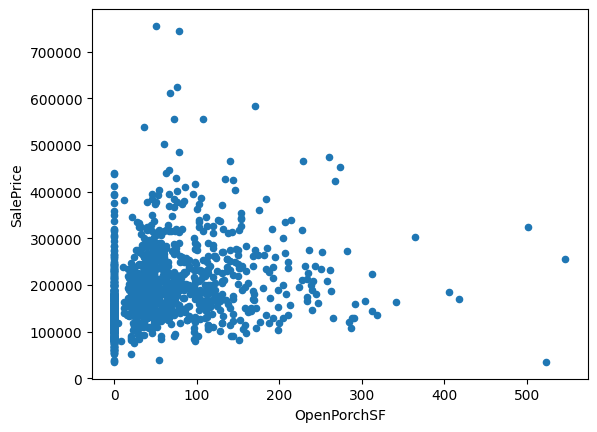

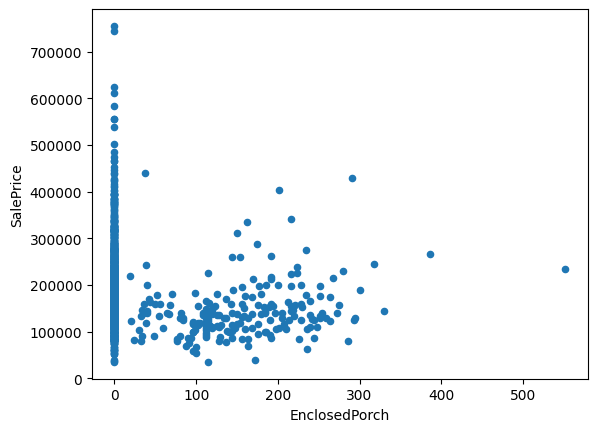

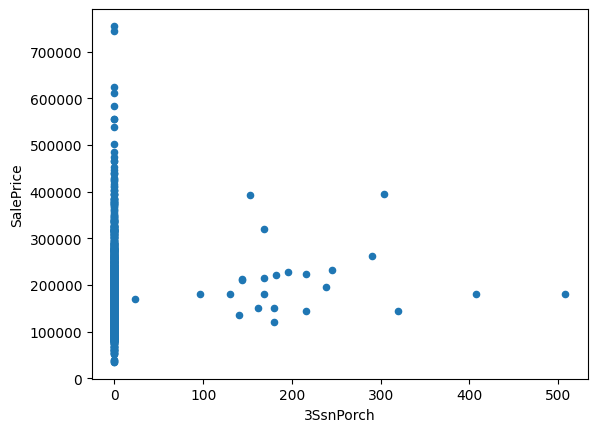

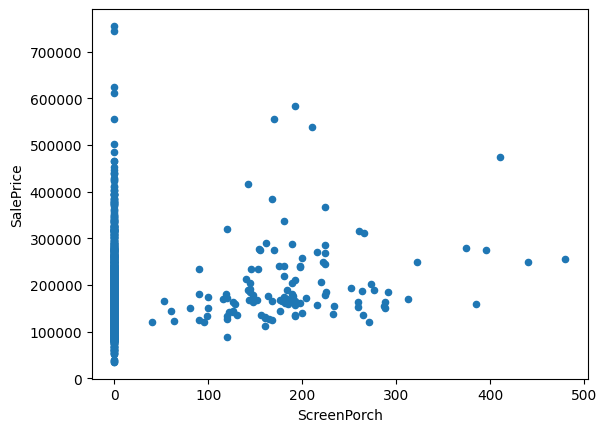

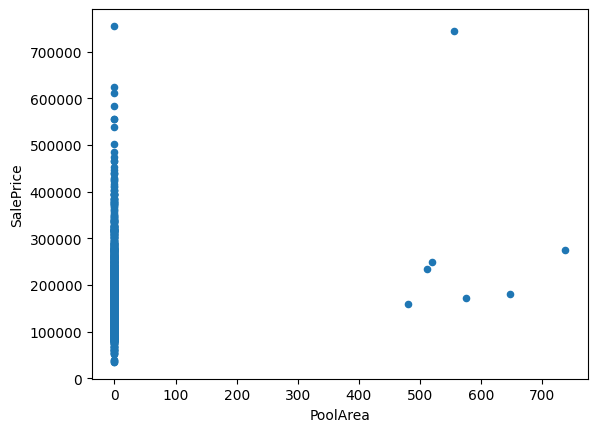

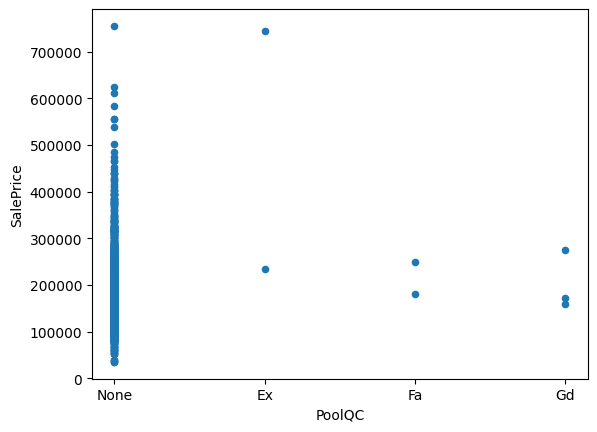

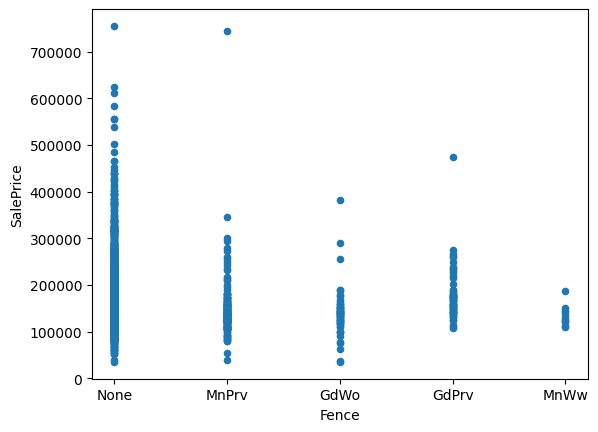

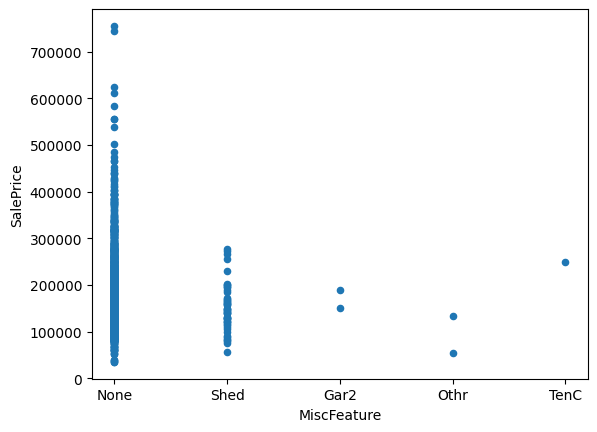

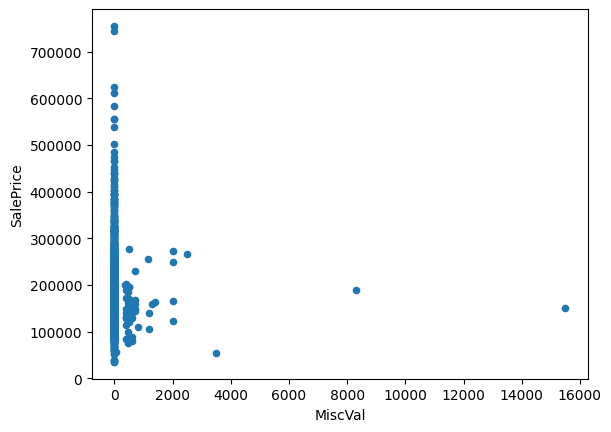

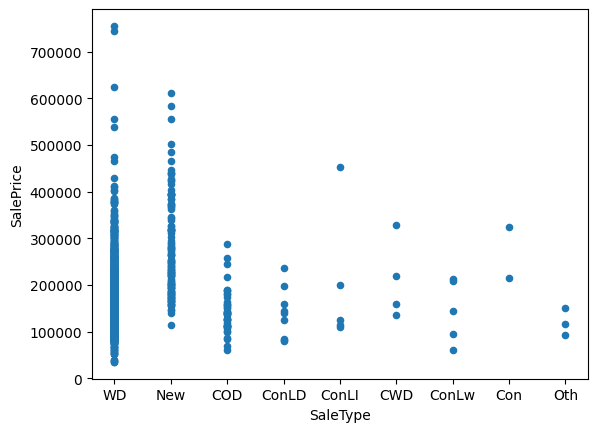

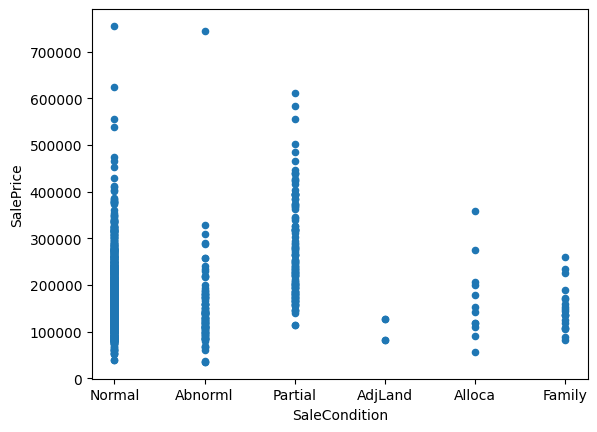

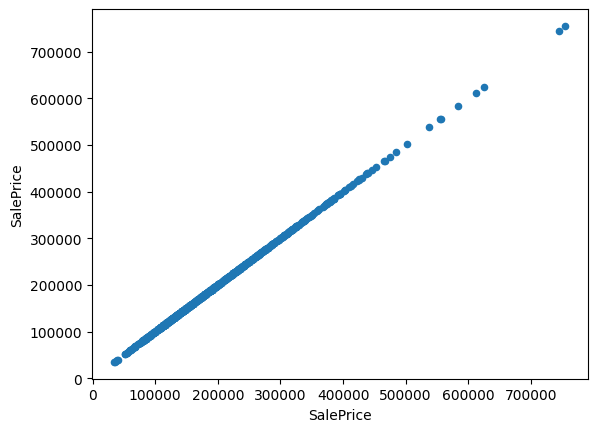

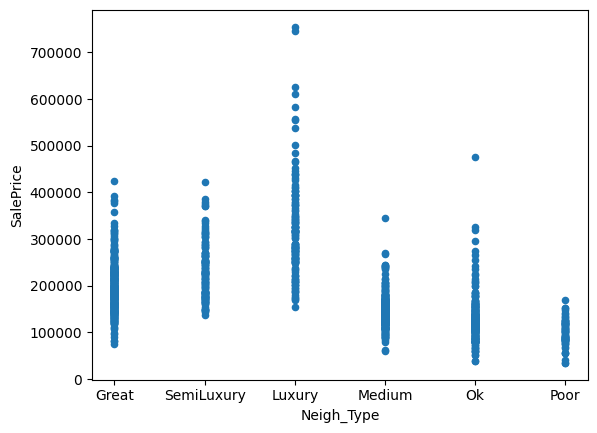

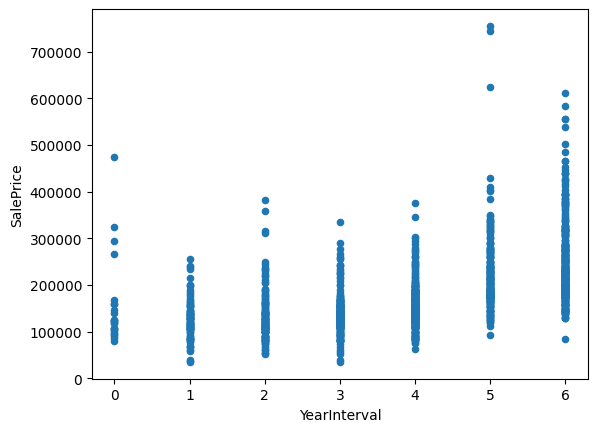

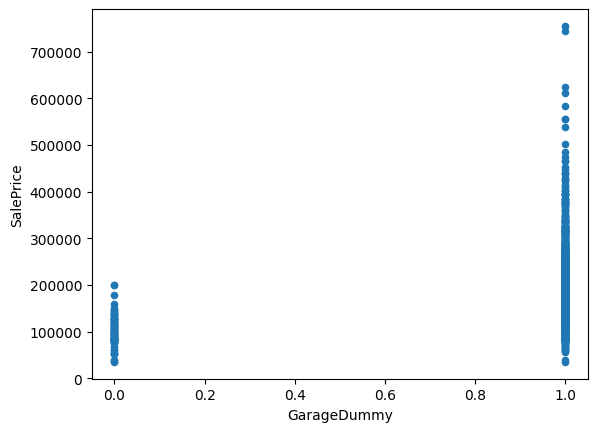

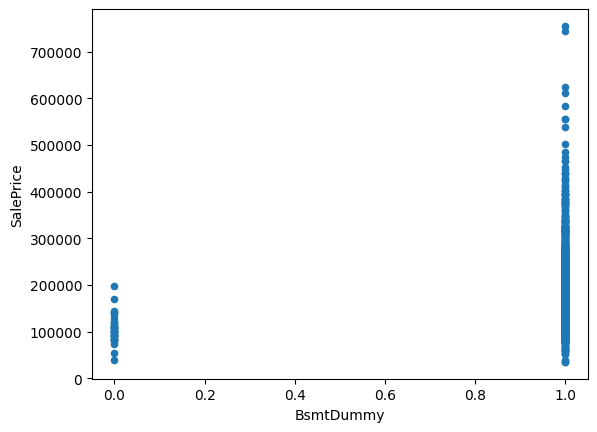

In [ ]:
#I produced a scatter plot of every variable in the data set against the y variable(SalePrice)
#These graphs helped me identify which variables are important and which ones to remove

for column in train_df:
    train_df.plot(x=column,y='SalePrice',kind='scatter')
    plt.show()

In [ ]:
# I chose to remove these variables based on looking at the scatter plot and seeing the feature importance of these variables in the models

train_df.drop(columns=['Id','Utilities','PoolQC','PoolArea','Condition2','RoofMatl','LowQualFinSF','3SsnPorch','Street', 'Condition1','Heating','Electrical', 'Exterior1st','Foundation', 'Functional','GarageCond', 'PavedDrive','Alley'],inplace=True)
test_df.drop(columns=['Utilities','PoolQC','PoolArea','Condition2','RoofMatl','LowQualFinSF','3SsnPorch','Street', 'Condition1','Heating','Electrical', 'Exterior1st','Foundation', 'Functional','GarageCond', 'PavedDrive','Alley'],inplace=True)

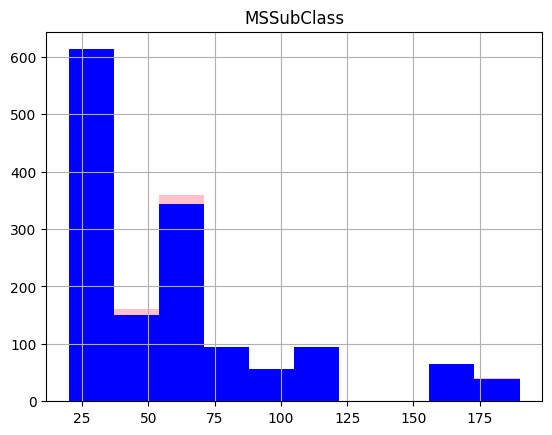

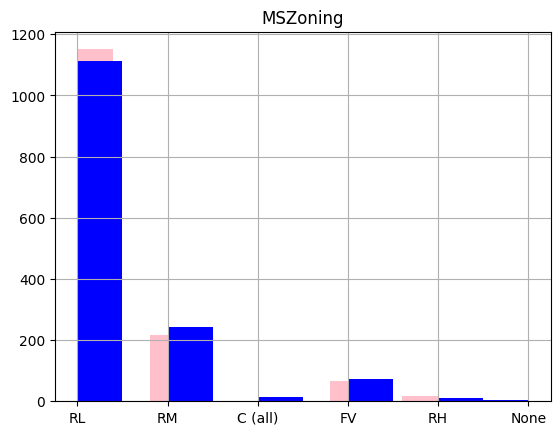

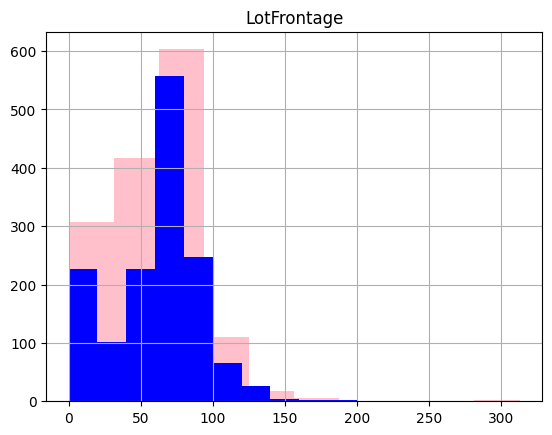

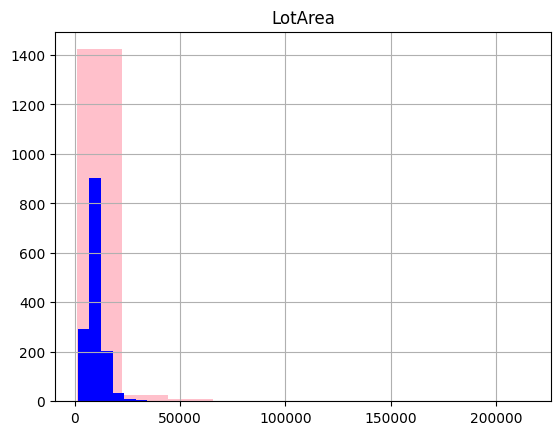

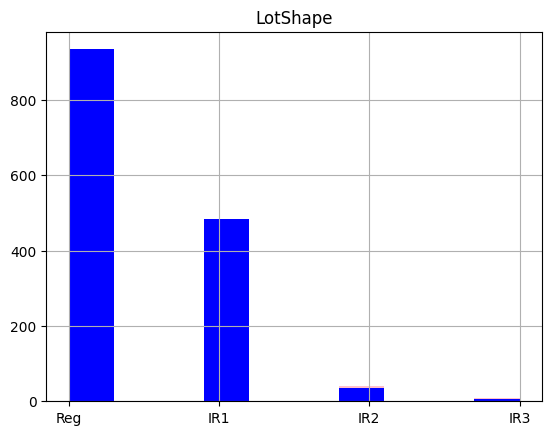

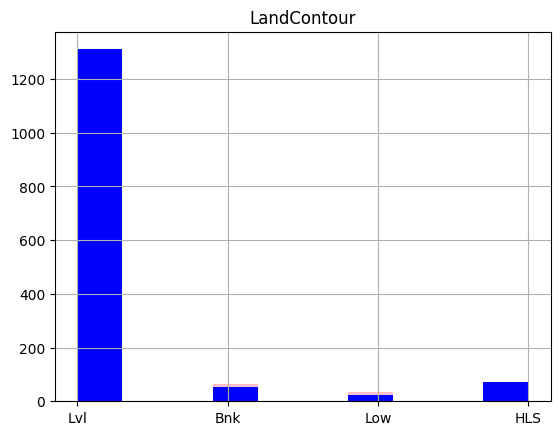

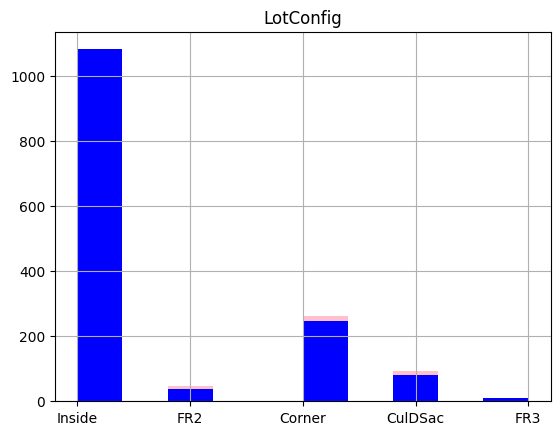

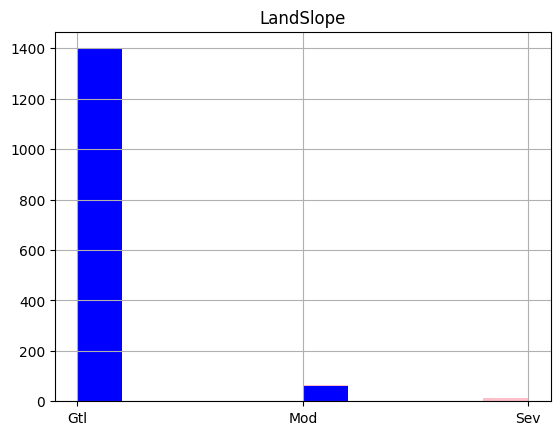

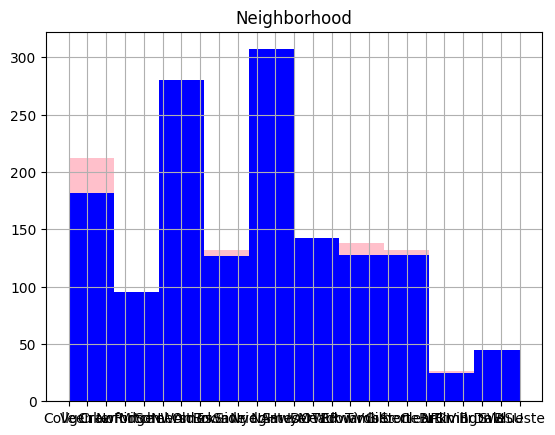

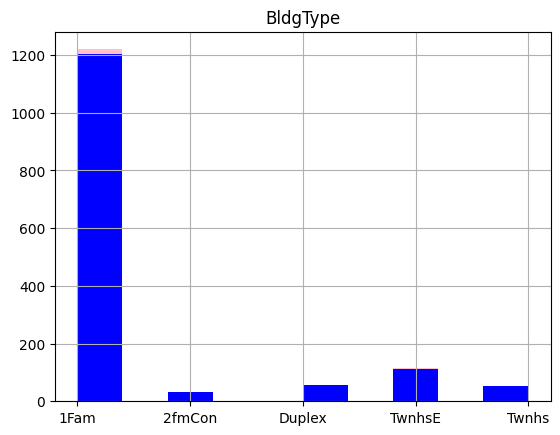

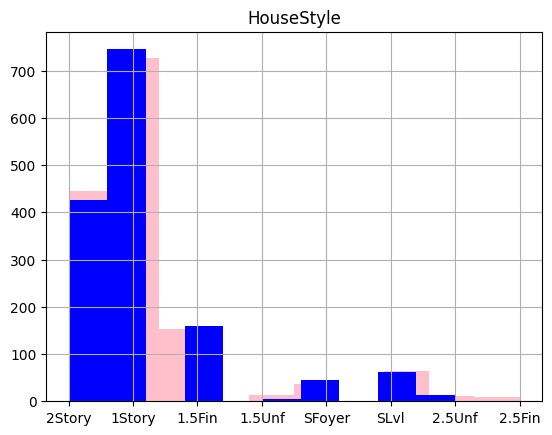

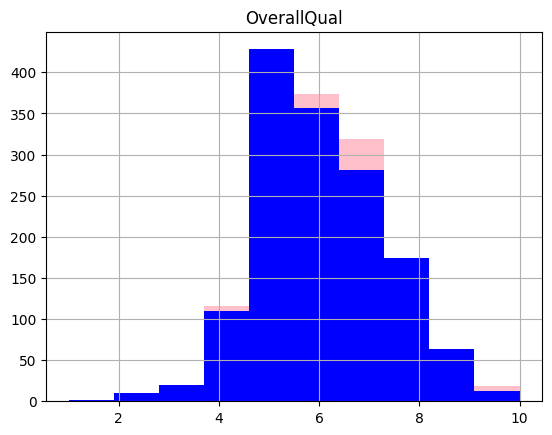

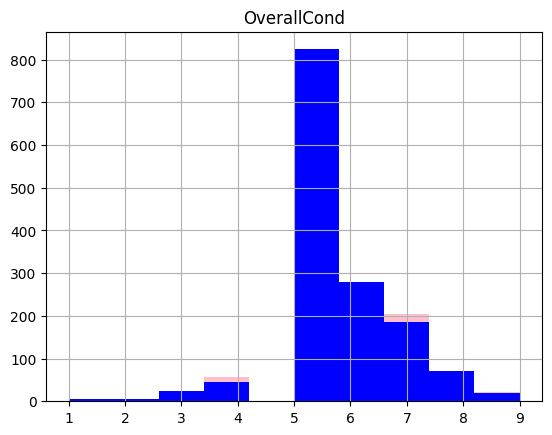

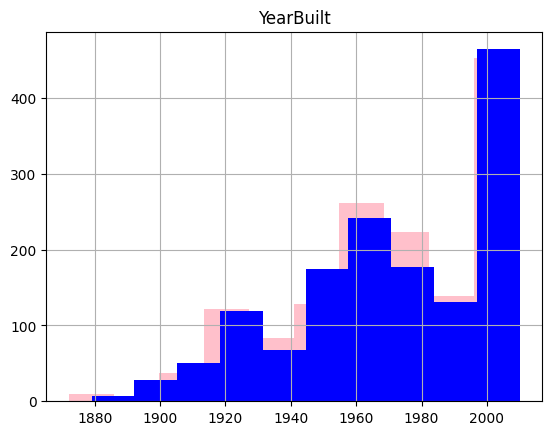

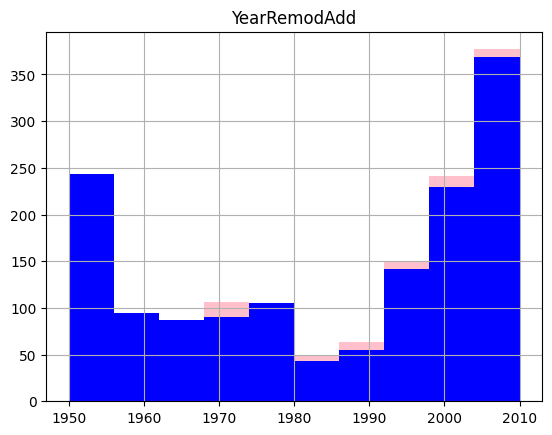

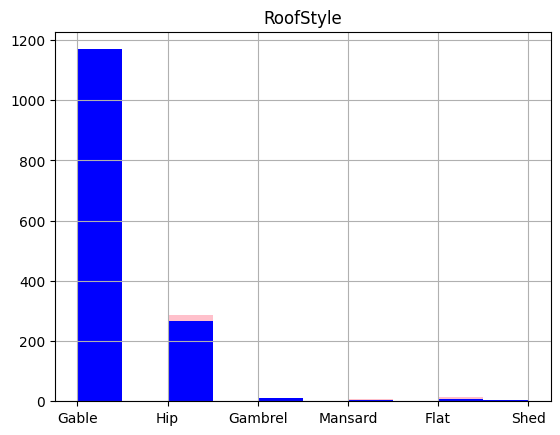

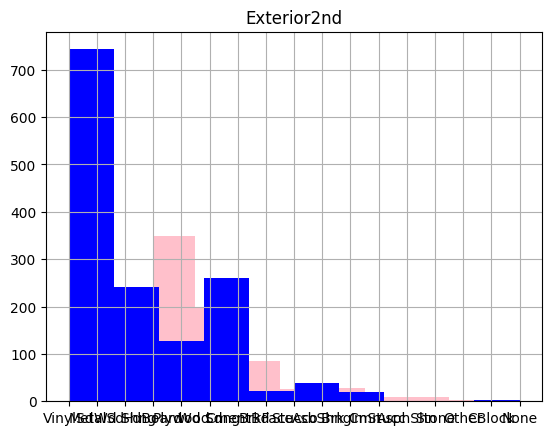

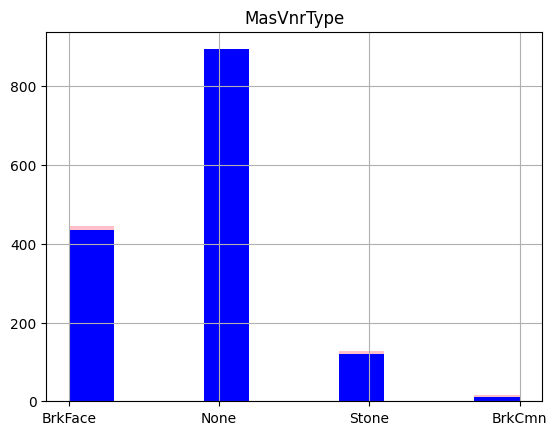

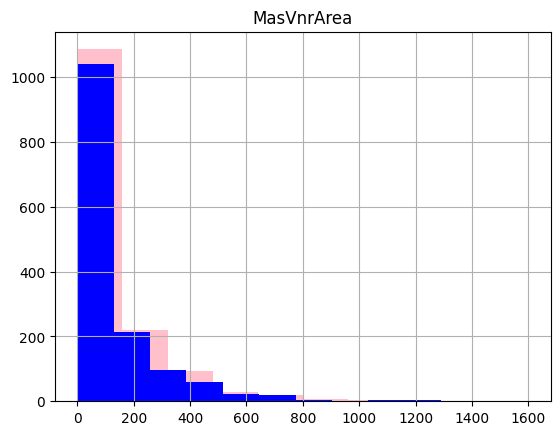

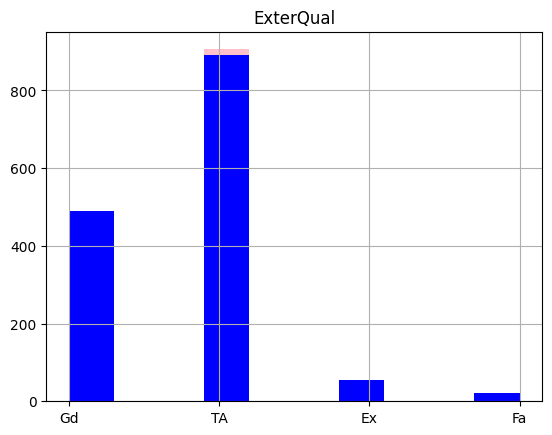

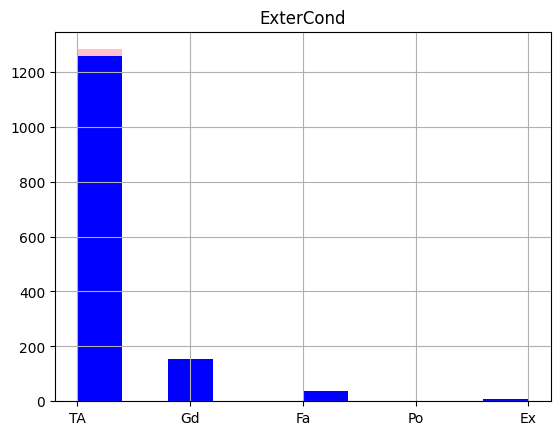

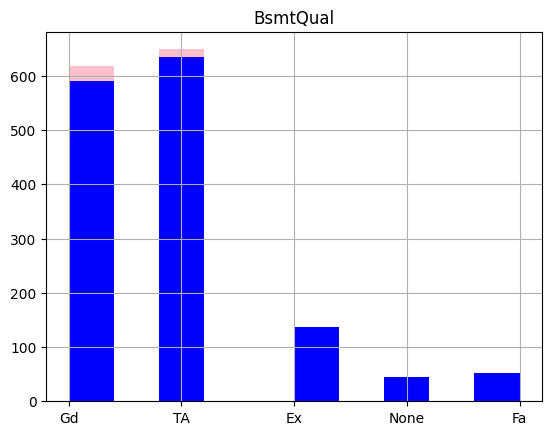

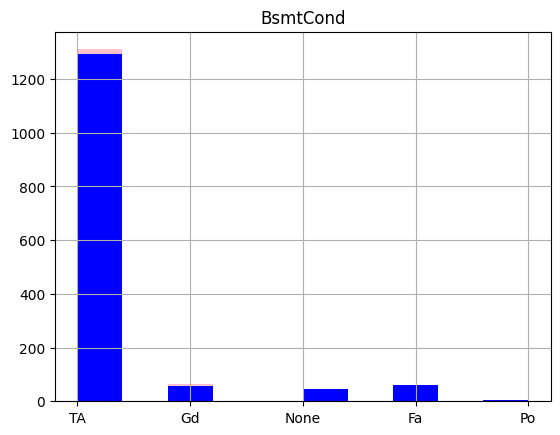

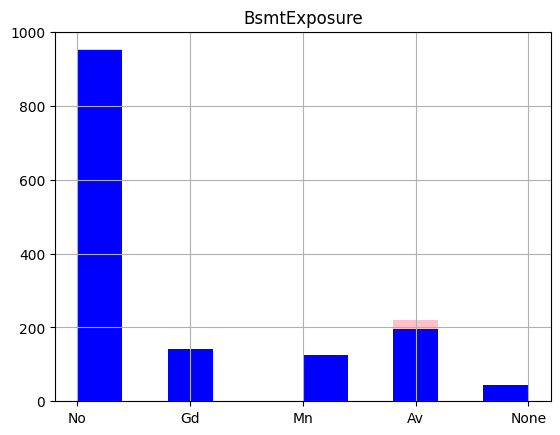

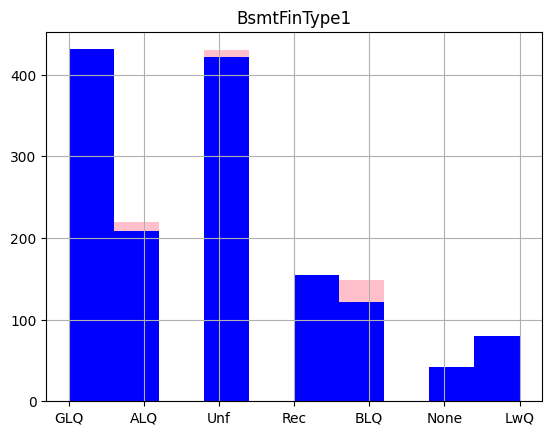

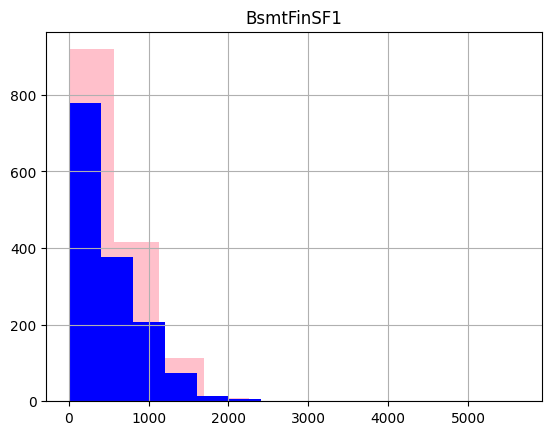

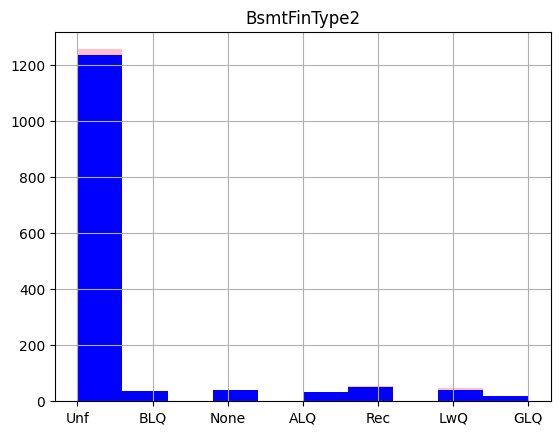

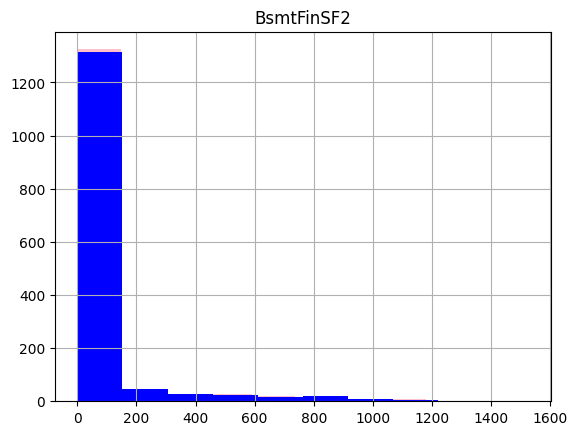

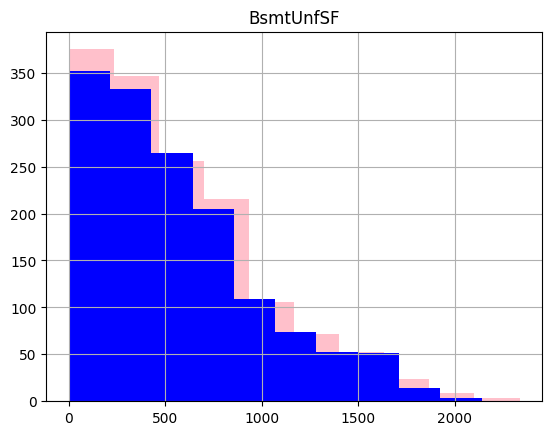

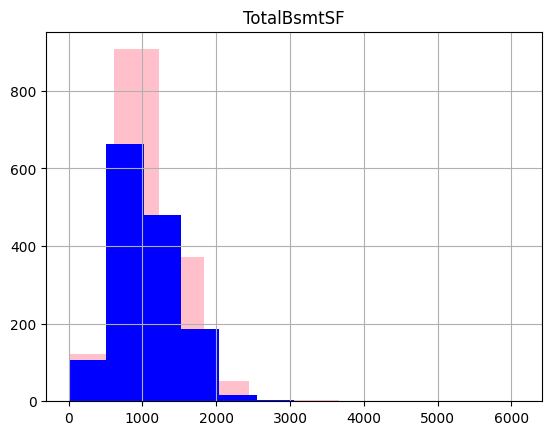

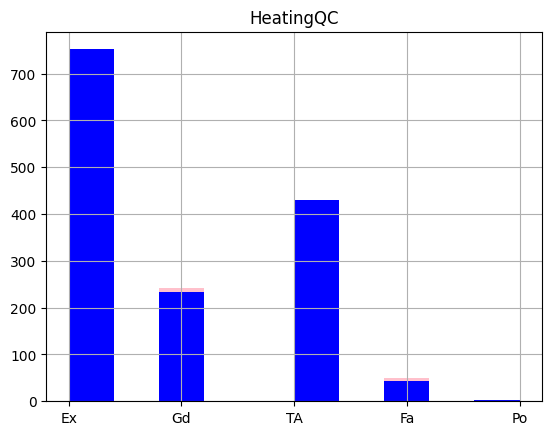

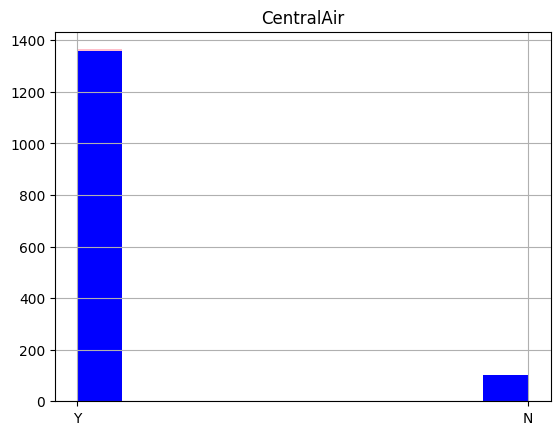

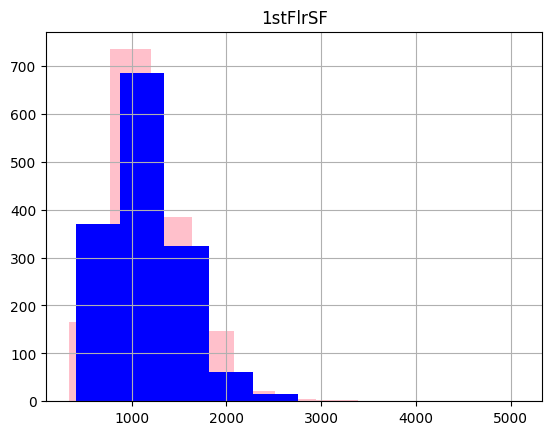

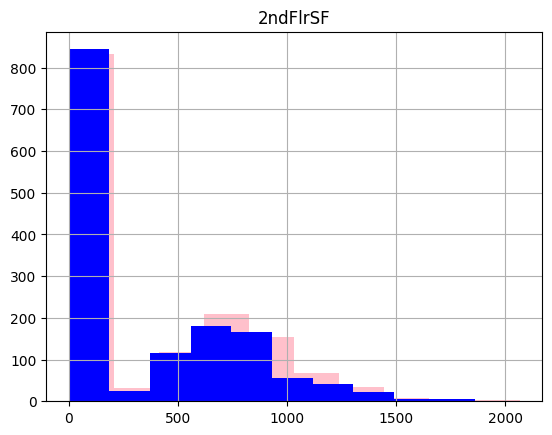

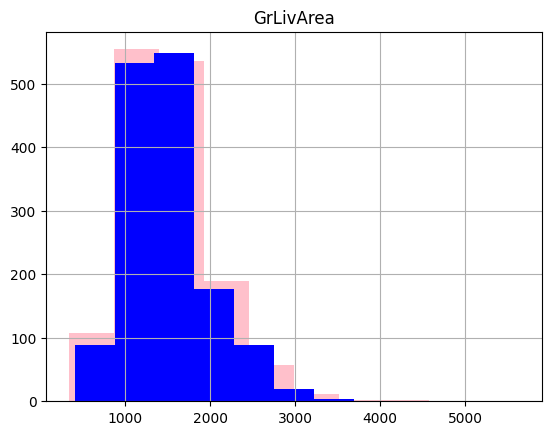

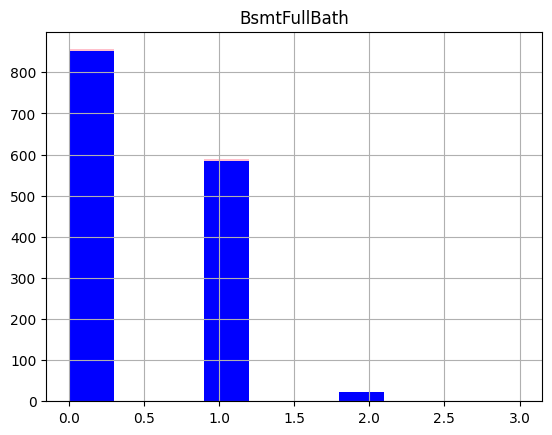

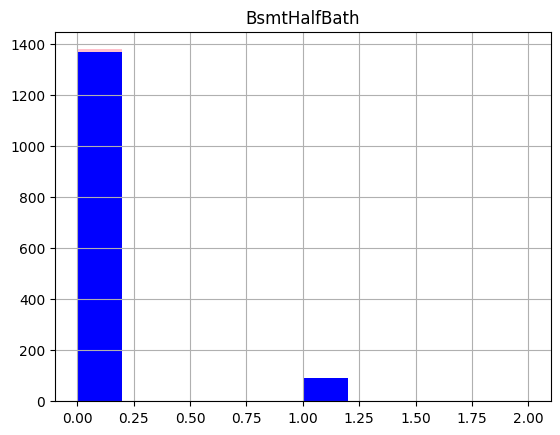

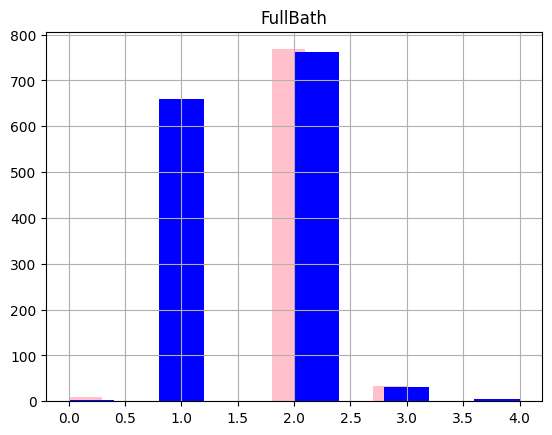

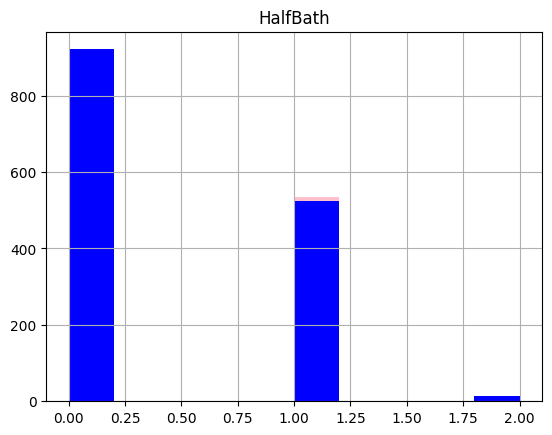

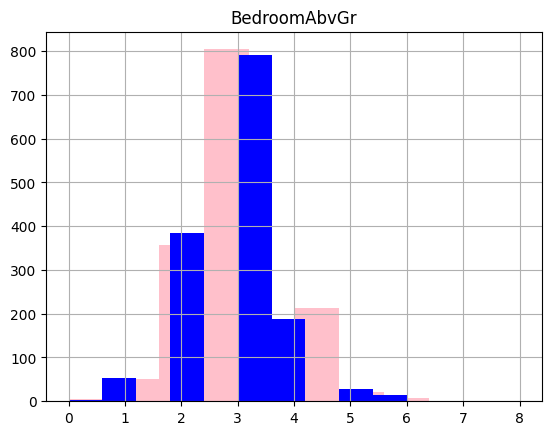

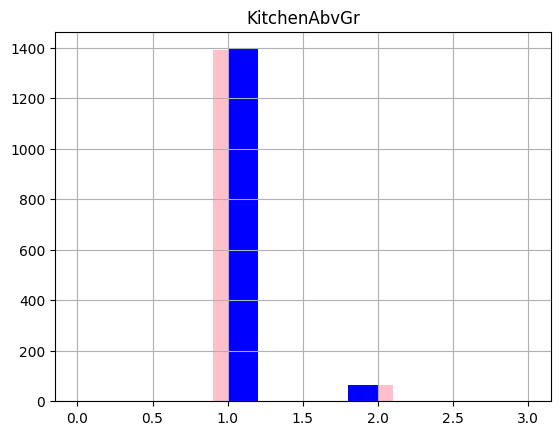

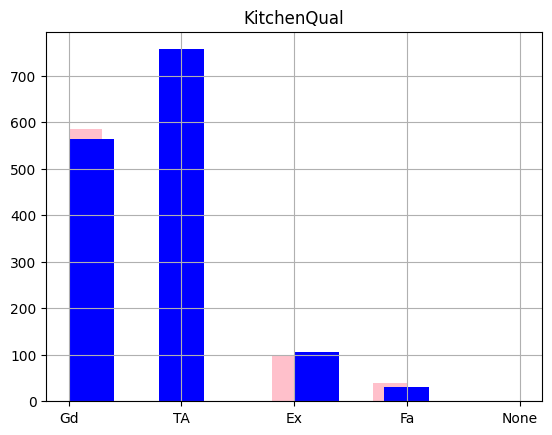

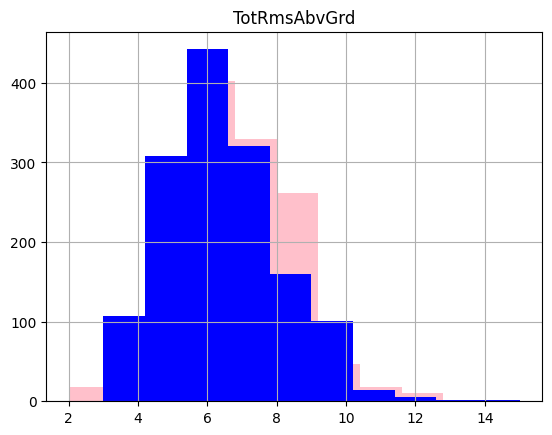

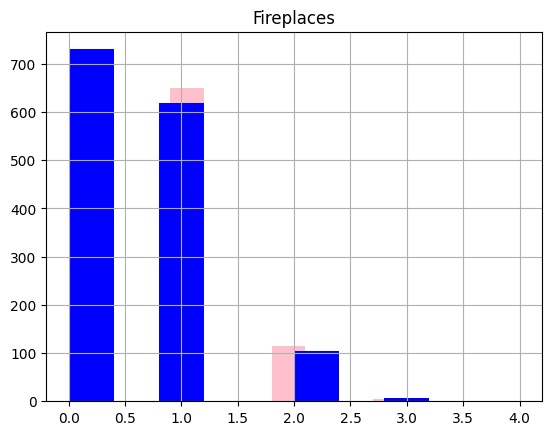

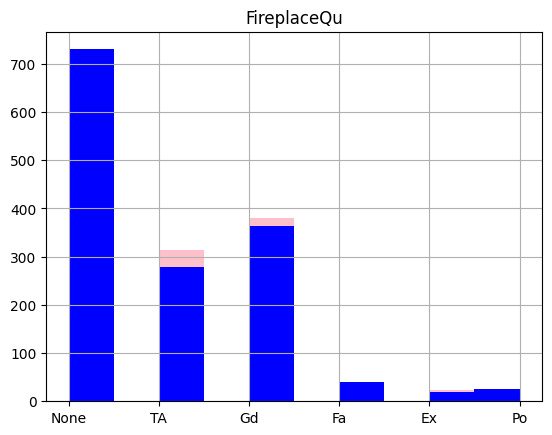

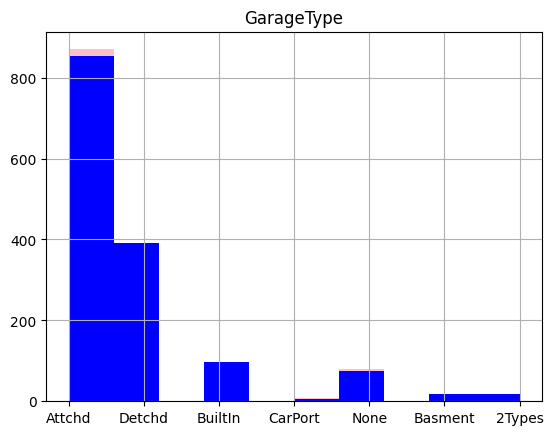

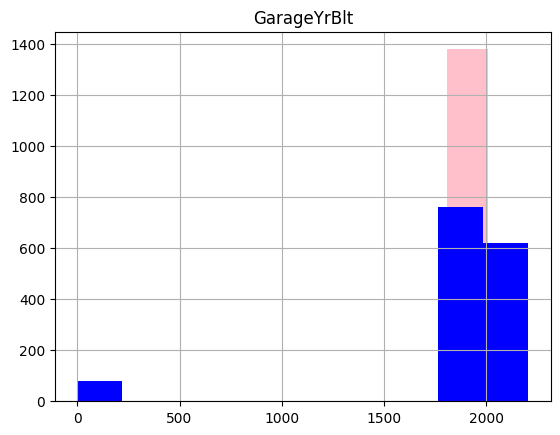

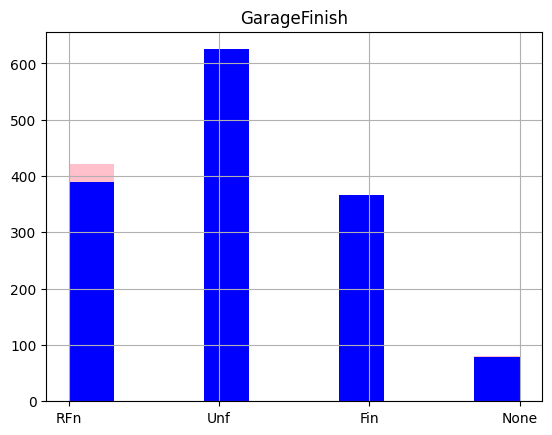

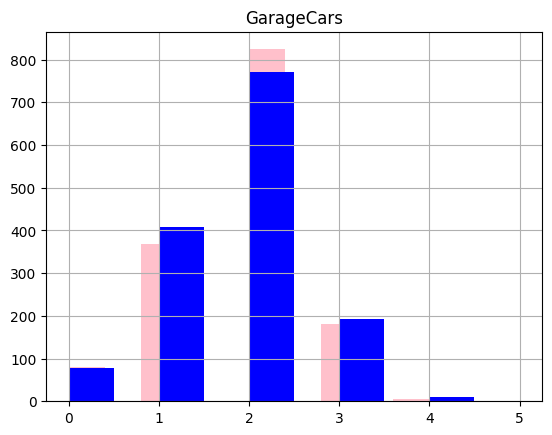

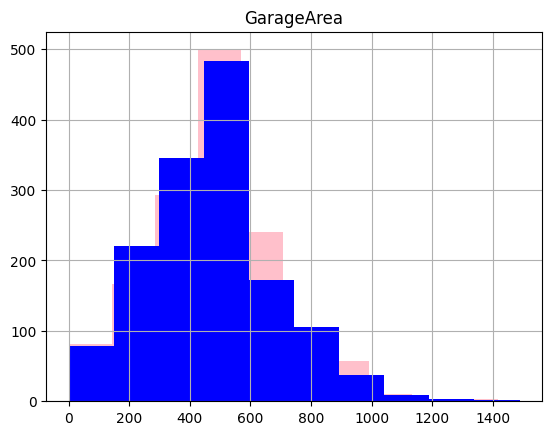

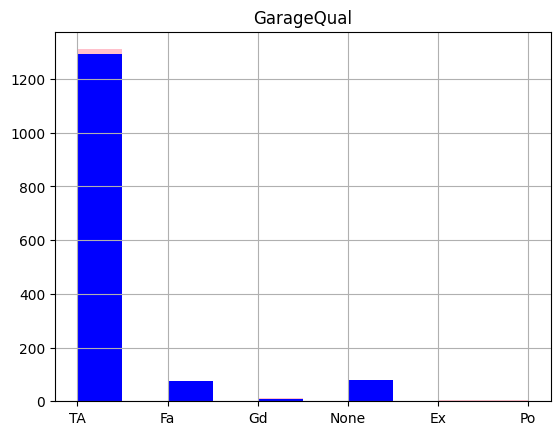

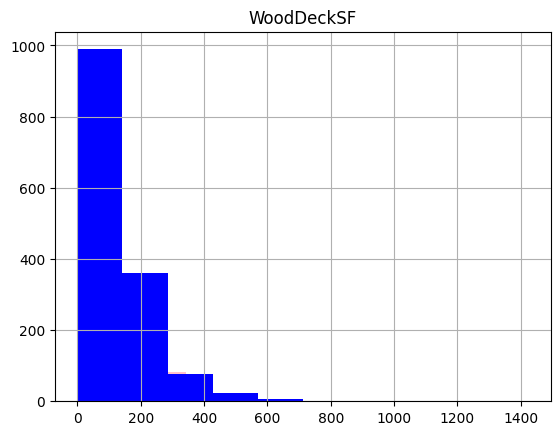

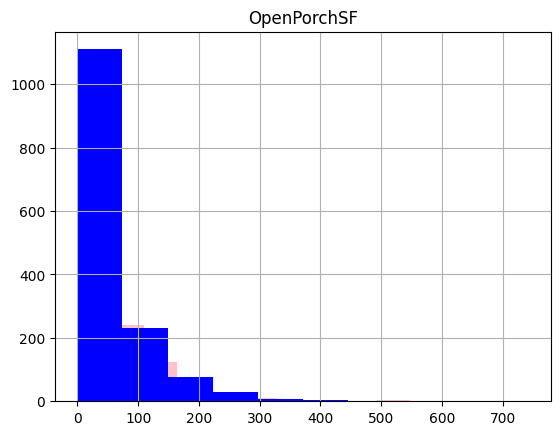

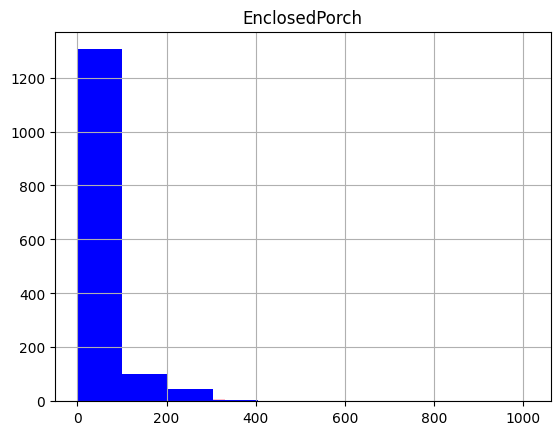

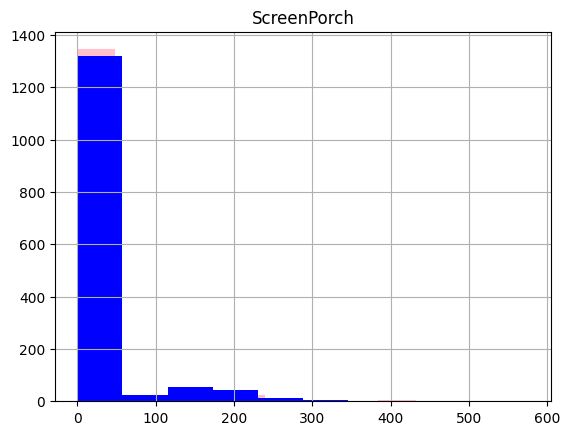

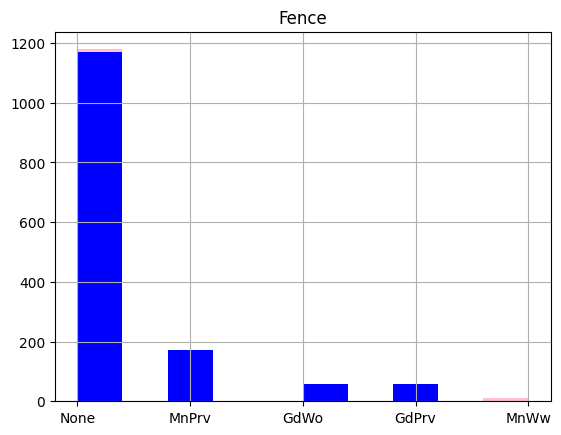

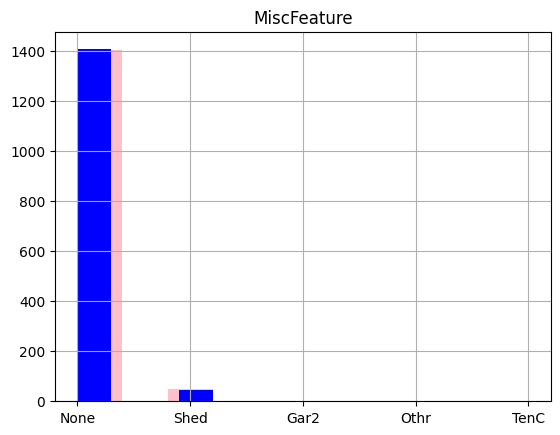

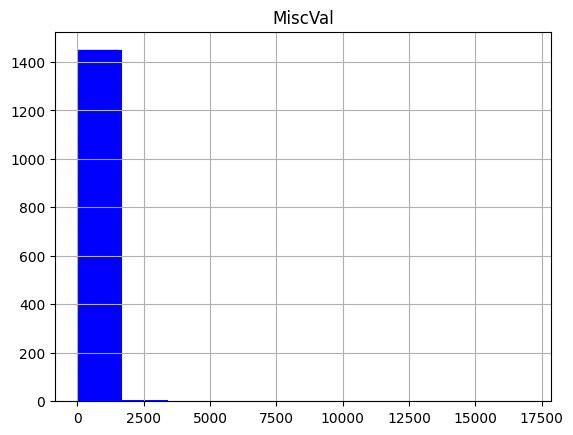

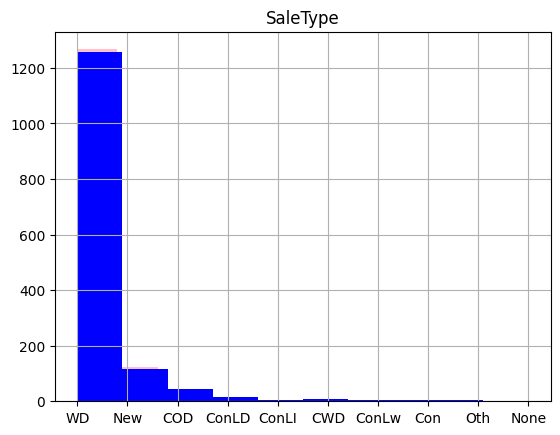

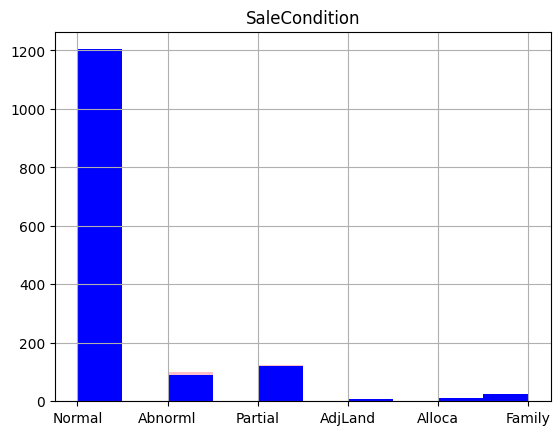

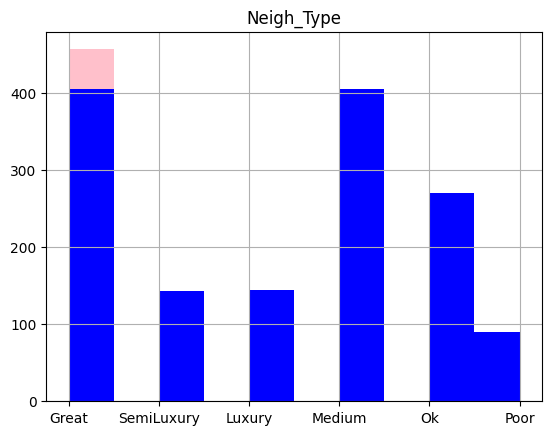

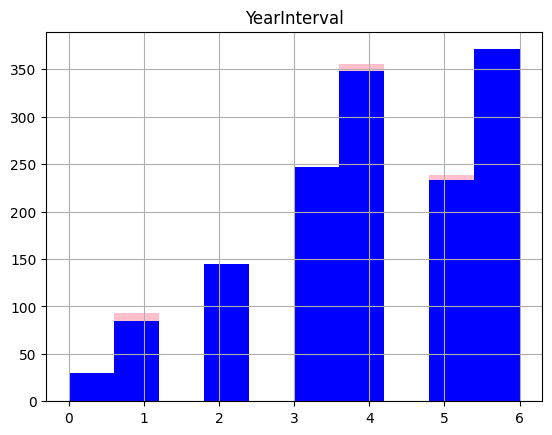

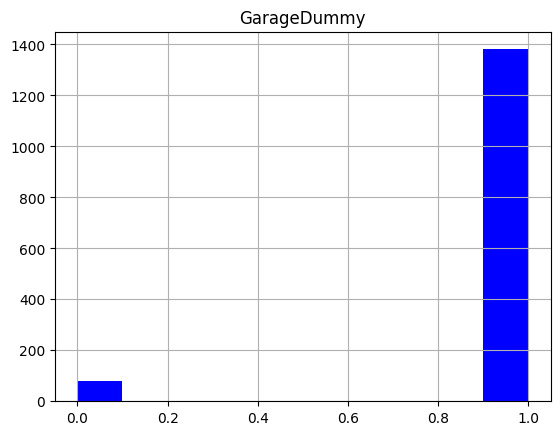

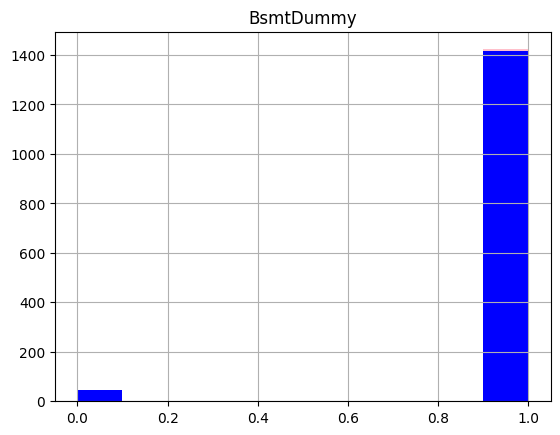

In [ ]:
#I used these graphs to get a better understanding of the distrbution of each data
#The goal was to identify which variables to feature scale, but when I actually feature scaled it hurt my MSE so I ended up not doing it

train_df_numeric = train_df.drop('SalePrice', axis=1)
train_df_numeric = train_df_numeric.apply(pd.to_numeric, errors='coerce')
test_df_numeric = test_df.apply(pd.to_numeric, errors='coerce')
for column in train_df_numeric:
    train_df[column].hist(color='pink')
    test_df[column].hist(color='blue')
    plt.title(column)
    plt.show()


In [ ]:
#I used pandas get dummies function to encode the categorial data of the test and training set
#I used X_train.align to account for issues where some categorical variables weren't the same in the test set

X_train = pd.get_dummies(train_df.drop('SalePrice', axis=1),drop_first=True)
X_test = pd.get_dummies(test_df.drop('Id', axis=1),drop_first=True)
X_train, X_test = X_train.align(X_test, axis=1, fill_value=0)
Y_train = train_df["SalePrice"]

# Machine Learning Models

Model Validation

In [ ]:
# I split up the training set so I could see the metrics of the training set using different models

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train2, X_val, Y_train2, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

In [ ]:
# These are all the models I tested

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.linear_model import Ridge, Lasso

rf = RandomForestRegressor(n_estimators= 10, random_state=0)
dt = DecisionTreeRegressor(max_depth=10,random_state=0)
xg_reg = xgb.XGBRegressor(objective = "reg:linear",n_estimators = 10,random_state=0)
ridge = Ridge(alpha = 0.01,random_state=0)
lasso = Lasso(alpha = 0.01,random_state=0)
gb = GradientBoostingRegressor(max_depth=4, n_estimators=200,random_state=2)

In [ ]:
# I found R squared of the training set for each model
# Random Forest, Decision Trees, XGBoost, and Gradient Boosting routinely had high R squared values

models = [rf,dt,xg_reg,ridge,lasso,gb]
for model in models:
  model.fit(X_train, Y_train)

  Y_predval = model.predict(X_val)

  r2 = r2_score(Y_val, Y_predval)
  print("R^2 Score:", r2)

R^2 Score: 0.9726383273719703
R^2 Score: 0.98537060800482
R^2 Score: 0.9768060520174817
R^2 Score: 0.8583660332522027


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:42:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.973e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


R^2 Score: 0.858417315218554
R^2 Score: 0.9922544768002396


In [ ]:
# I did the same with MSE also
# The same variables had the lowest MSEs with gradient boosting having the lowest by a lot
# One intersting thing was decision trees had great performance on the training set but when actually using it for the test set it performed
# routinely bad. This is mostly due to the idea that decision trees tend to overfit training data.

from sklearn.metrics import mean_squared_error as MSE

for model in models:
  model.fit(X_train, Y_train)

  Y_predval = model.predict(X_val)

  mse = MSE(Y_val, Y_predval)
  rmse = mse**(1/2)
  print("MSE Score:", rmse)

MSE Score: 13746.112393449874
MSE Score: 10051.287787309016
MSE Score: 12655.983756317572
MSE Score: 31274.637074903978


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:42:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.973e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


MSE Score: 31268.974696997615
MSE Score: 7313.646225396366


Random Forest - A tree based model that can be used for classification or regression. The model is fitted on the training set and builds a decision tree based on a certain number of data points. Then it builds more trees and then it predicts the value of the y variable by taking the average of the decision trees with respect to each of datapoint. Radom forest might be less accurate if there is a large amount of categorial variable.

In [ ]:
rf_params = {
    'max_depth':[1,3,5,15,20],
    'n_estimators':[5,15,25,35,40],
    'min_samples_leaf':[1],
    'max_features': ['auto']
}

In [ ]:
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_params,
    scoring='neg_mean_squared_error',
    cv=10,
    verbose=1,
    n_jobs=-1
)

Decision Tree - A type of supervised learning algorithm where a 'tree' is made up by a bunch of nodes. Each node has a split point, and based on a certain criteria you go down either side of the node. For example in a classification problem if a split point is 1000 then for each variable it will go down the left side of the tree if it is less than 1000 and right side if greater. Regression works similar except a node split is trained on mean squared error and tries to get each value as close as it can to the mean of that leaf. A drawback is that decision trees tend to overfit training values.

In [ ]:

dt_params = {
  'max_depth': [5, 8,10,20],
  'min_samples_leaf': [0.04, .2,.5],
  'max_features': [0.4,0.6,1]
}


In [ ]:

dt_grid = GridSearchCV(
    estimator=dt,
    param_grid=dt_params,
    scoring='neg_mean_squared_error',
    cv=10,
    verbose=1,
    n_jobs=-1
)


XGB Regressor - An ensemble learning method that combines many individual models to get a final prediction. Each of the models is known as a base learner which are good at predicting unique parts of the data. The base learners are combined and only the good predictions are kept. It is relatively new but is considered one of the best supervised learning models.

In [ ]:
# I used this to get the feature importance of each variable in xg boost
# If the feature importance was extremely low for a variable such as > 0.000001 I removed it from the dataset

xg_reg.fit(X_train,Y_train)
feature_importance = [(X_train.columns[i], item) for i, item in enumerate(xg_reg.feature_importances_)]

sorted_feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importance:
    print("{0:s}: {1:.6f}".format(feature, importance))


OverallQual: 0.483007
Neighborhood_Edwards: 0.050662
GarageCars: 0.041020
GrLivArea: 0.032937
2ndFlrSF: 0.024029
KitchenQual_TA: 0.023746
KitchenAbvGr: 0.023634
Neigh_Type_Poor: 0.021553
BsmtQual_Gd: 0.016909
TotalBsmtSF: 0.016810
GarageType_Detchd: 0.015492
GarageType_Attchd: 0.014627
Neigh_Type_Luxury: 0.014307
BsmtFinSF1: 0.009661
YearBuilt: 0.009583
FireplaceQu_None: 0.009250
Neigh_Type_Ok: 0.009036
Neigh_Type_Medium: 0.008918
CentralAir_Y: 0.007483
MSZoning_RM: 0.007208
FullBath: 0.006906
Fireplaces: 0.006648
YearRemodAdd: 0.006349
SaleType_New: 0.005969
1stFlrSF: 0.005881
Exterior2nd_VinylSd: 0.005316
ExterQual_TA: 0.005160
TotRmsAbvGrd: 0.005029
LotArea: 0.005028
GarageArea: 0.004901
OverallCond: 0.004363
BsmtFinSF2: 0.004179
Neighborhood_Crawfor: 0.004179
EnclosedPorch: 0.004032
LotFrontage: 0.003763
MasVnrArea: 0.003113
ScreenPorch: 0.003091
BsmtFinType1_GLQ: 0.003084
BsmtExposure_Gd: 0.003076
BsmtFinType1_Rec: 0.003057
FireplaceQu_Gd: 0.002632
LandContour_HLS: 0.002542
HouseS

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:42:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [ ]:
xgb_params = {
    'colsample_bytree': [0.8, 0.7,0.6],
    'n_estimators': [60,70,80],
    'max_depth': [4,5,7]
}

In [ ]:
xgb_grid = GridSearchCV(
    estimator = xg_reg, param_grid =  xgb_params, scoring="neg_mean_squared_error",cv=4,verbose=1
    )

Ridge Regression - A linear regression model that penalizes variables with large negative or positive coefficients. An alpha value is selected by how much large variables need to be corrected. A higher alpha value means more correction. The alpha values is multiplied by the varible's sum of squared values.

In [ ]:
ridge_params = {
    'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0],
    'max_iter':[0,1,5,10]
}

In [ ]:
ridge_grid = GridSearchCV(
    estimator = ridge, param_grid =  ridge_params, scoring="neg_mean_squared_error",cv=5,verbose=1
    )

Lasso Regression - Same model as ridge regression except alpha is multiplies by the sum of the variable's absolute value

In [ ]:
lasso_params = {
    'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0],
    'max_iter':[0,1,5,10,1000]
}

In [ ]:
lasso_grid = GridSearchCV(
    estimator = lasso, param_grid =  lasso_params, scoring="neg_mean_squared_error",cv=5,verbose=1
    )

Gradient Boosting - Similar to XGB where multiple weaker models are combined to give an accurate prediction. It uses regression trees as its models and finds the residuals of each of the trees. The residuals are found from taking the residuals of the previous tree. Once it has one through all the trees the model can make a prediction. One drawback is it is more time consuming than other models.

In [ ]:
gb_params = {
    'max_depth':[4,5],
    'n_estimators':[250,275],
    'subsample':[0.75,0.8],
            'max_features':[0.2]
}

In [ ]:
gb_grid = GridSearchCV(
    estimator = gb, param_grid =  gb_params, scoring="neg_mean_squared_error",cv=5,verbose=1
    )

In [ ]:
# I chose XGB and gb as they were the two most accurate models for me
# Random forest was also effective, but removing it gave me a slightly lower RMSE

regressors = [ ('XGBRegressor',xgb_grid),('GradientBoostingRegressor',gb_grid)]

In [ ]:
# Combing variables in a voting regression was the most effective method for me in minimizing RMSE

from sklearn.ensemble import VotingRegressor
vr = VotingRegressor(estimators=regressors)
vr.fit(X_train,Y_train)
Y_pred = vr.predict(X_test)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:46:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:46:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:46:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:46:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [ ]:
# prepare a submission file
submission = pd.DataFrame({
        "Id": test_df["Id"],
        "SalePrice": Y_pred
    })
submission.to_csv('dt1.csv', index=False)

files.download('dt1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>